### BIBLIOTECAS

In [1]:
import os
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import ccf

### Leitura Arquivo files_29_01_and_20_05_concatenados_sem_NaNs

In [2]:
caminho_arquivos_pkl_29_01_and_20_05 = r'H:\Path_Python\Dados_Python_2024\Lameirinho\Ficheiros_PKL_Saida\Arquivos_concatenados\files_29_01_and_20_05_concatenados_sem_NaNs.pkl'
df_parte_I = pd.read_pickle(caminho_arquivos_pkl_29_01_and_20_05)

In [3]:
df_parte_I.columns

Index(['G2_Gerador_Potência', 'G2_Oleo_Motor_Temp', 'G2_Oleo_Motor_Press',
       'G2_Carga_Temperature', 'G2_Aumento_Pressão_Valvula_Real',
       'G2_Gerador_Corrente_Média', 'G2_Gerador_Tensão_Média',
       'G2_Gerador_Potência_Reativa', 'G2_Gerador_Potência_Aparente',
       'G2_Gerador_frequencia', 'G2_Gerador_Fator_de_Potência',
       'G2_Acelerador_Valv_Posição', 'G2_Jacket_Water_pressão',
       'G2_Jacket_Water_Temp', 'G2_Cilindro_EX_GAS_TEMP_Média',
       'g2_Turbocharger_Bypass_Posição', 'G2_Saída_Ativa_total',
       'G2_Saída_Reativa_total', 'G2_LAMBDA_TECJET', 'G2_Gerador_Corrente_L1',
       'G2_Gerador_Voltagem_L1_N', 'G2_Gerador_enrolamento_temp_L1',
       'G2_Gerador_enrolamento_temp_L2', 'G2_Gerador_enrolamento_temp_L3',
       'G2_Gerador_Extremidade_acionamento_rolamento',
       'G2_Gerador_Bearing_nondriveend', 'G2_Gerador_Corrente_L2',
       'G2_Gerador_Voltagem_L2_L3', 'G2_Gerador_Voltagem_L2_N',
       'G2_Gerador_Corrente_N', 'G2_Excitação_Voltagem',
   

### VISUALIZAR DATAS DE INICIO E FIM DO DATAFRAME

In [4]:
# Visualizar a variação do datetime do DataFrame
print("Data mínima:", df_parte_I.index.min())
print("Data máxima:", df_parte_I.index.max())

Data mínima: 2024-01-29 09:33:08
Data máxima: 2024-05-20 10:46:47


### VISUALIZAÇÃO GRÁFICA DAS VARIÁVEIS

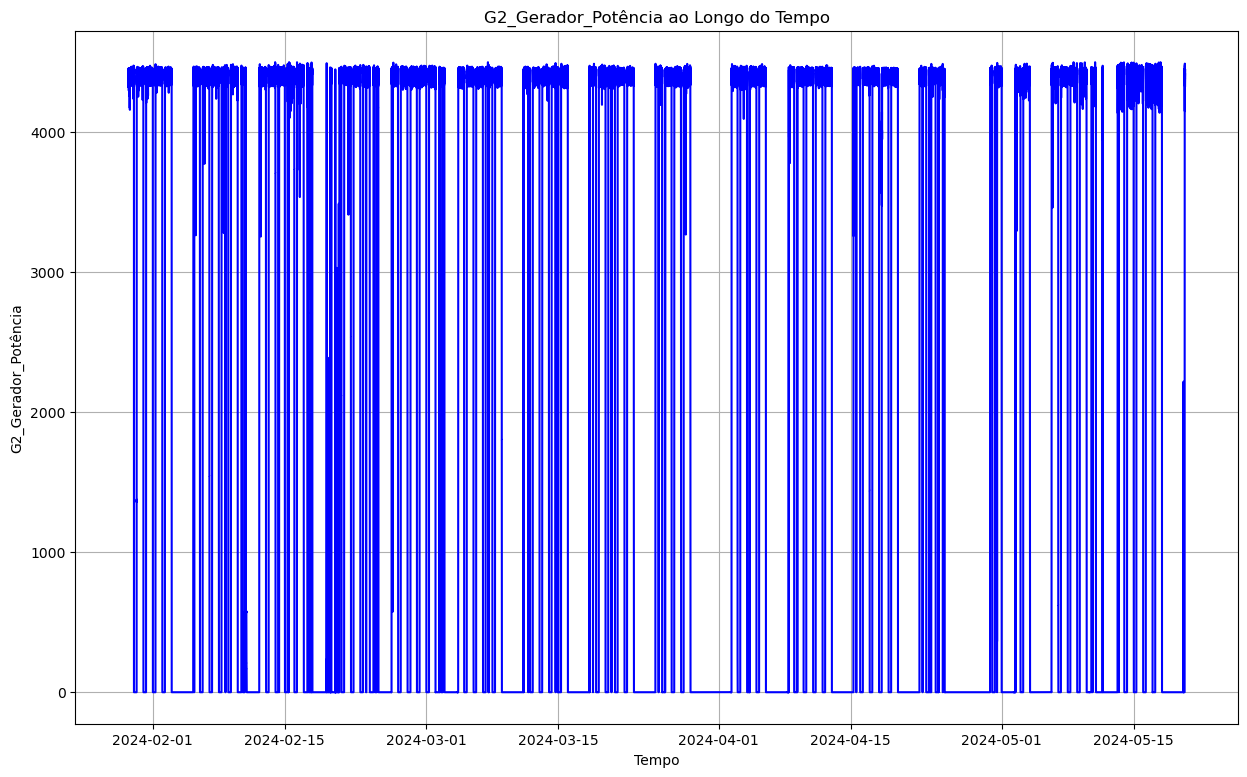

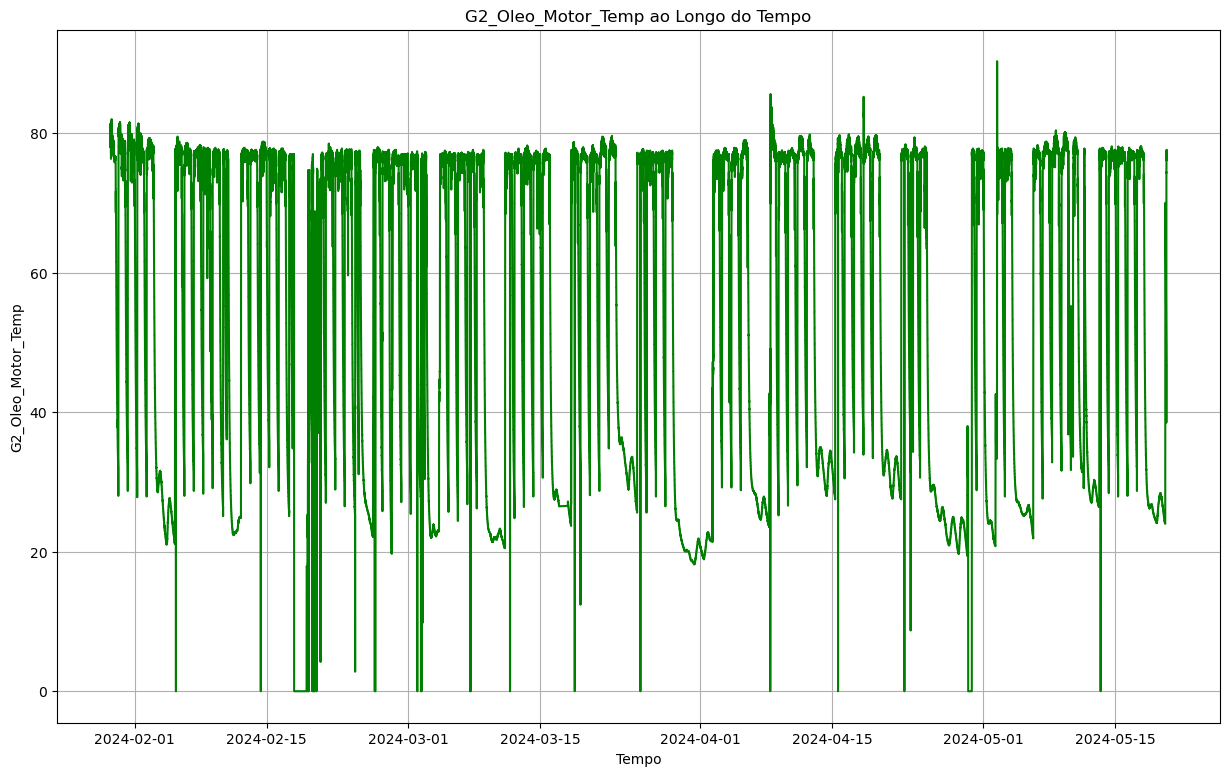

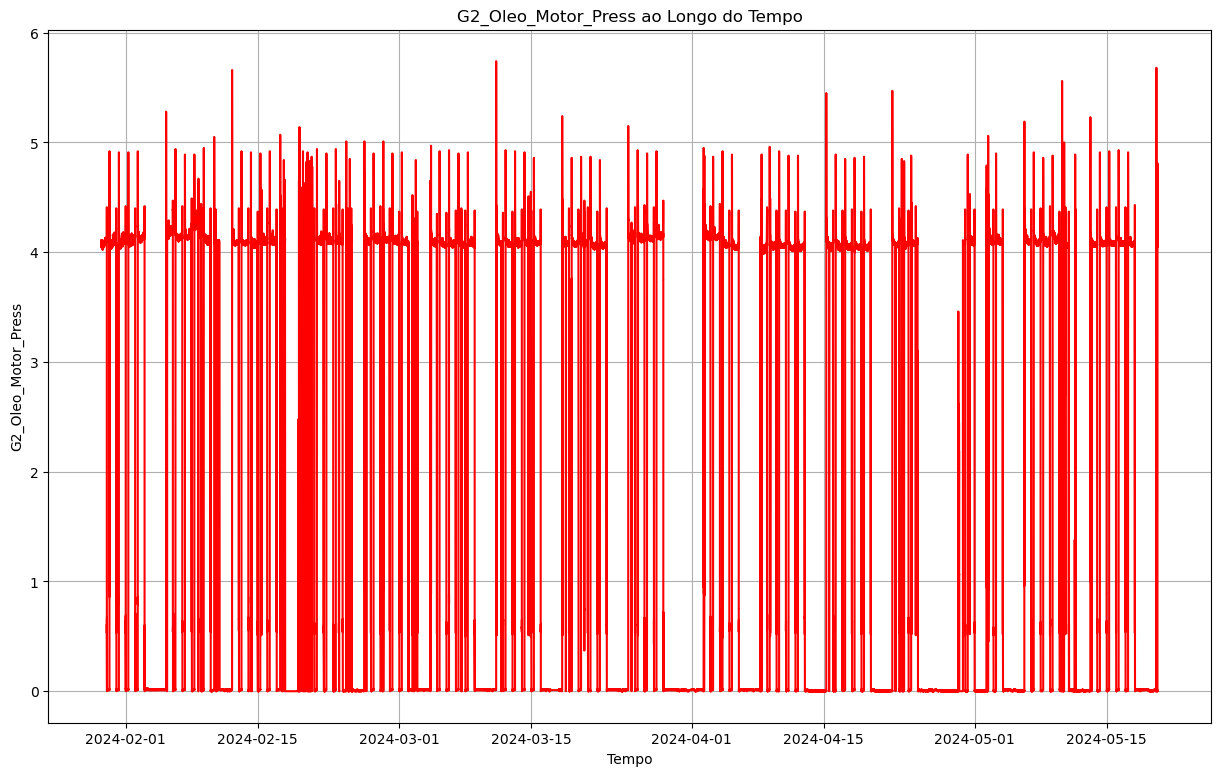

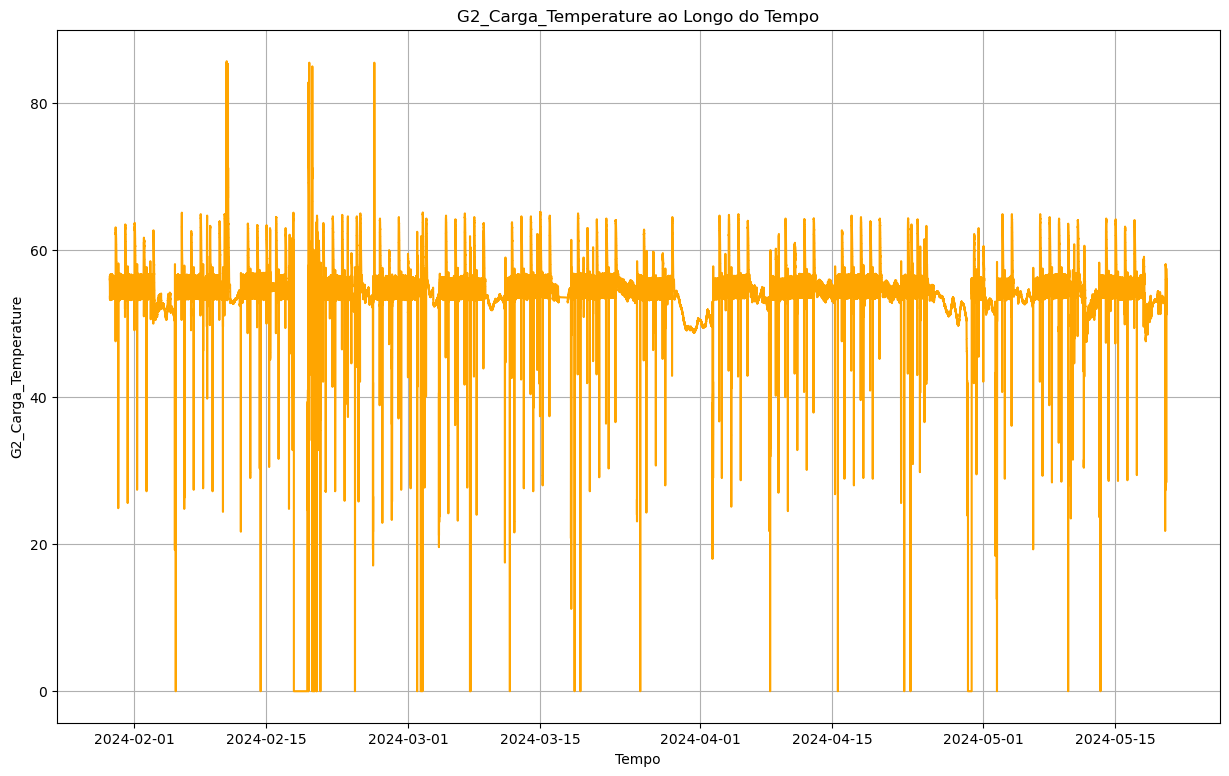

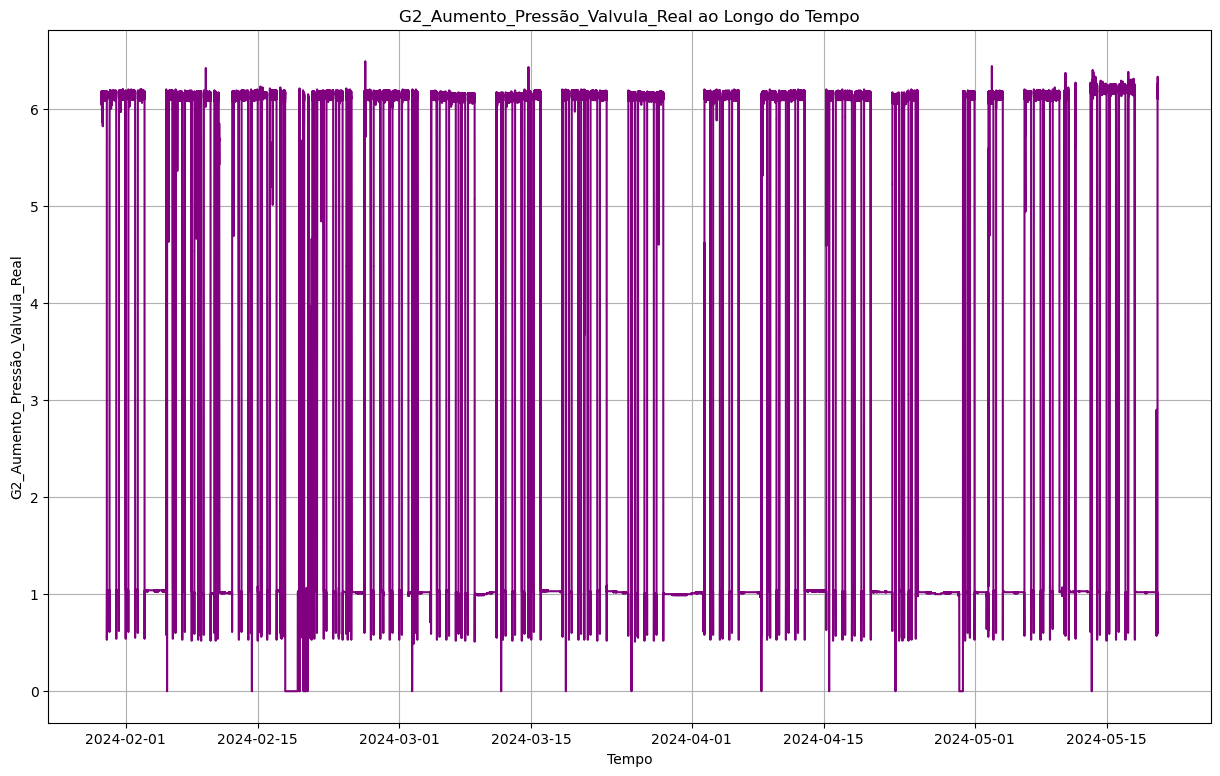

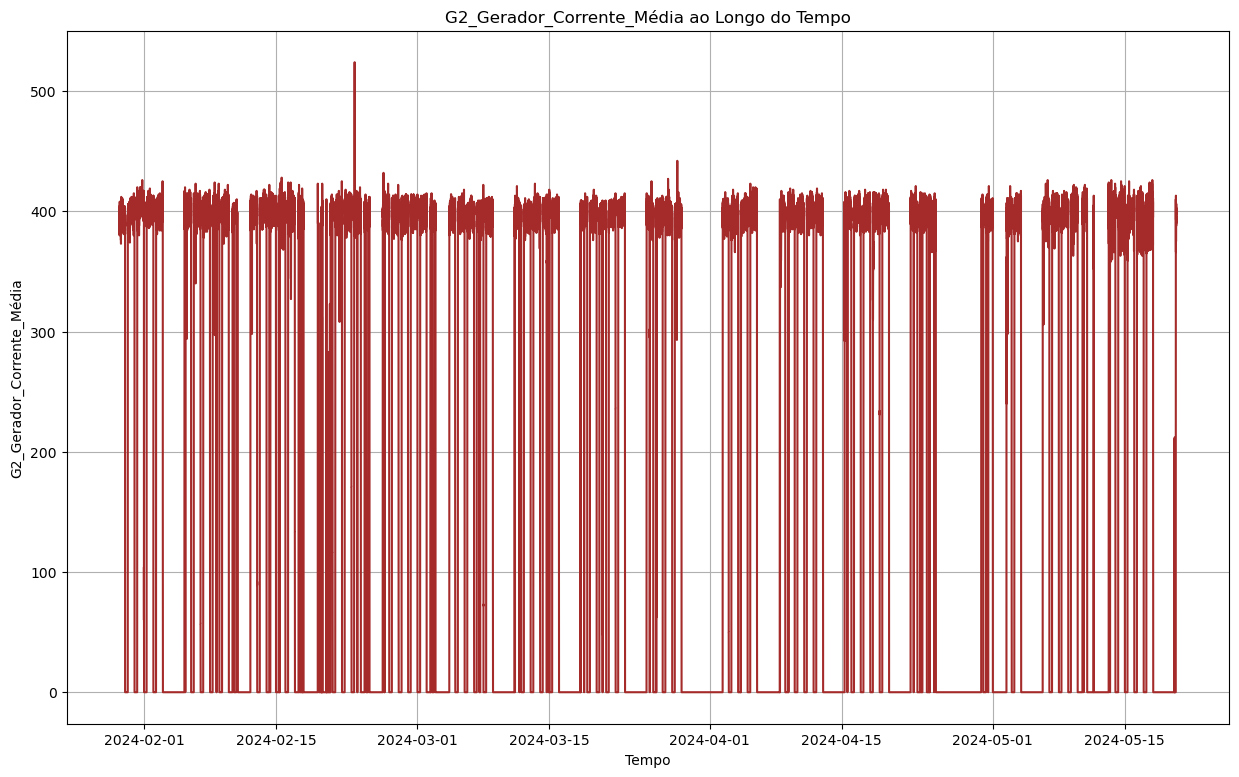

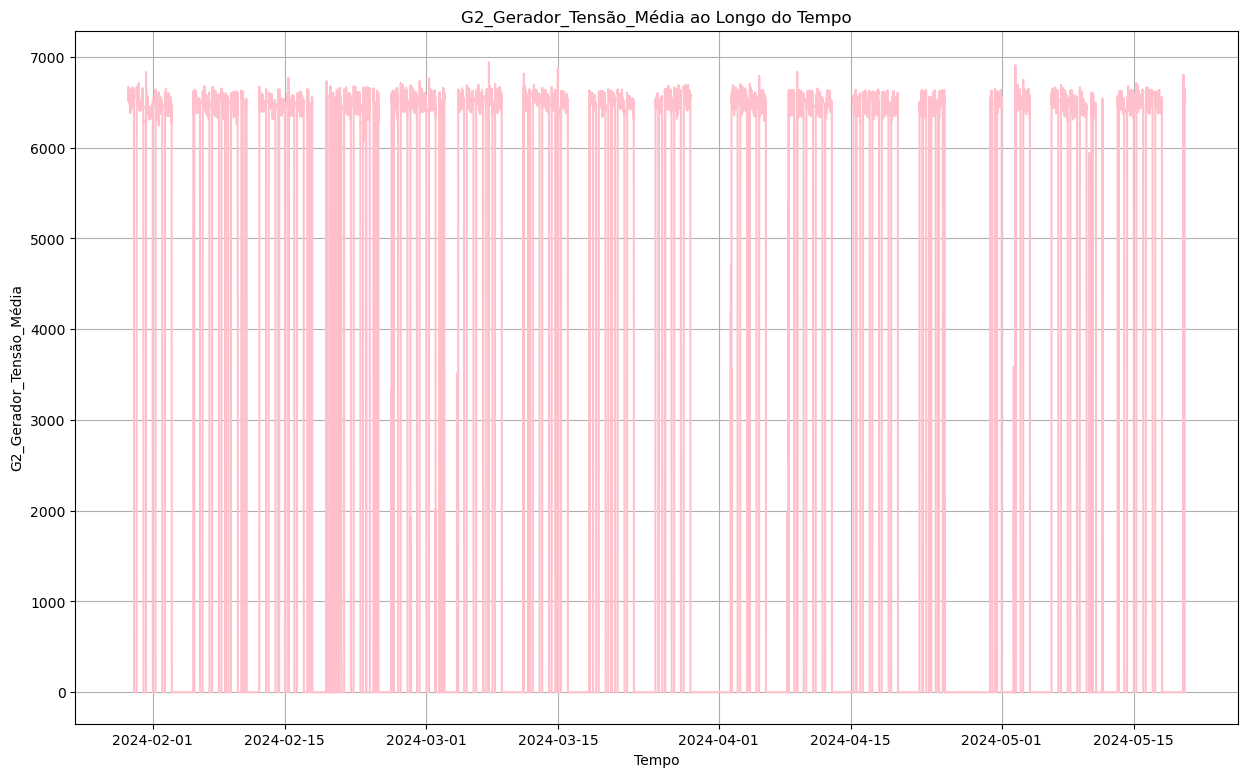

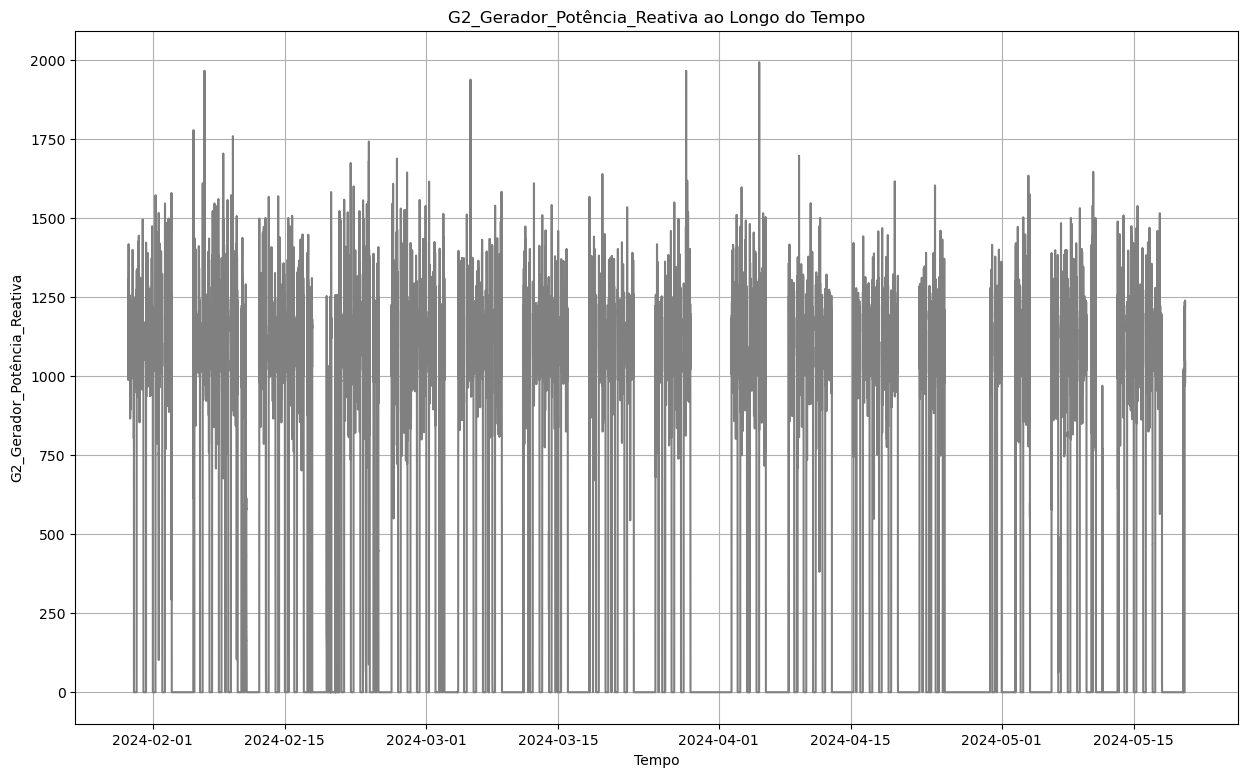

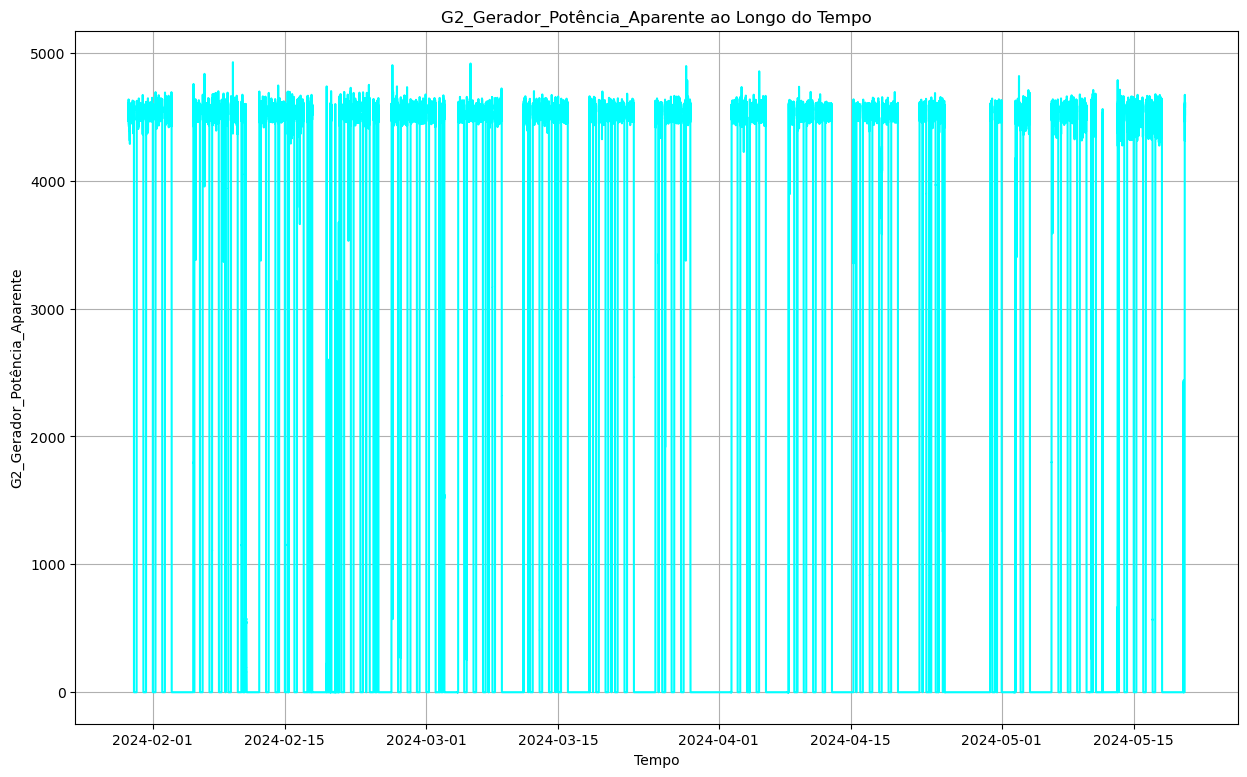

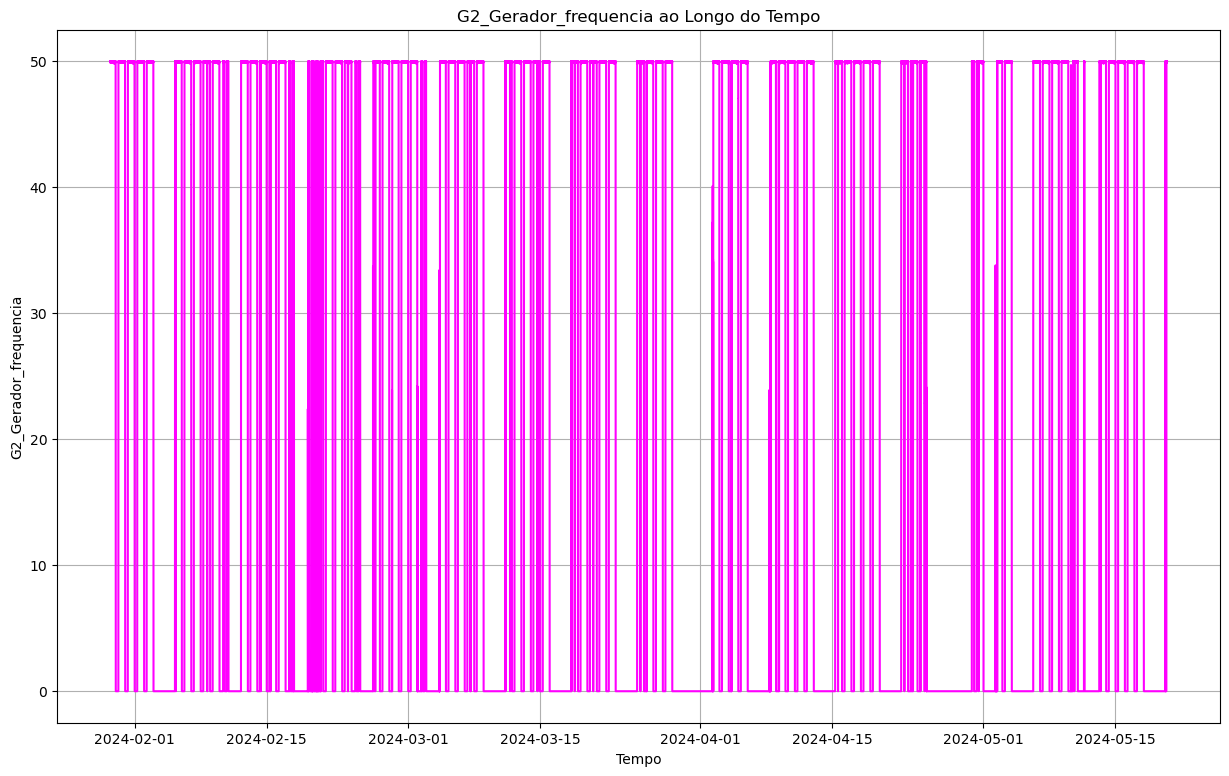

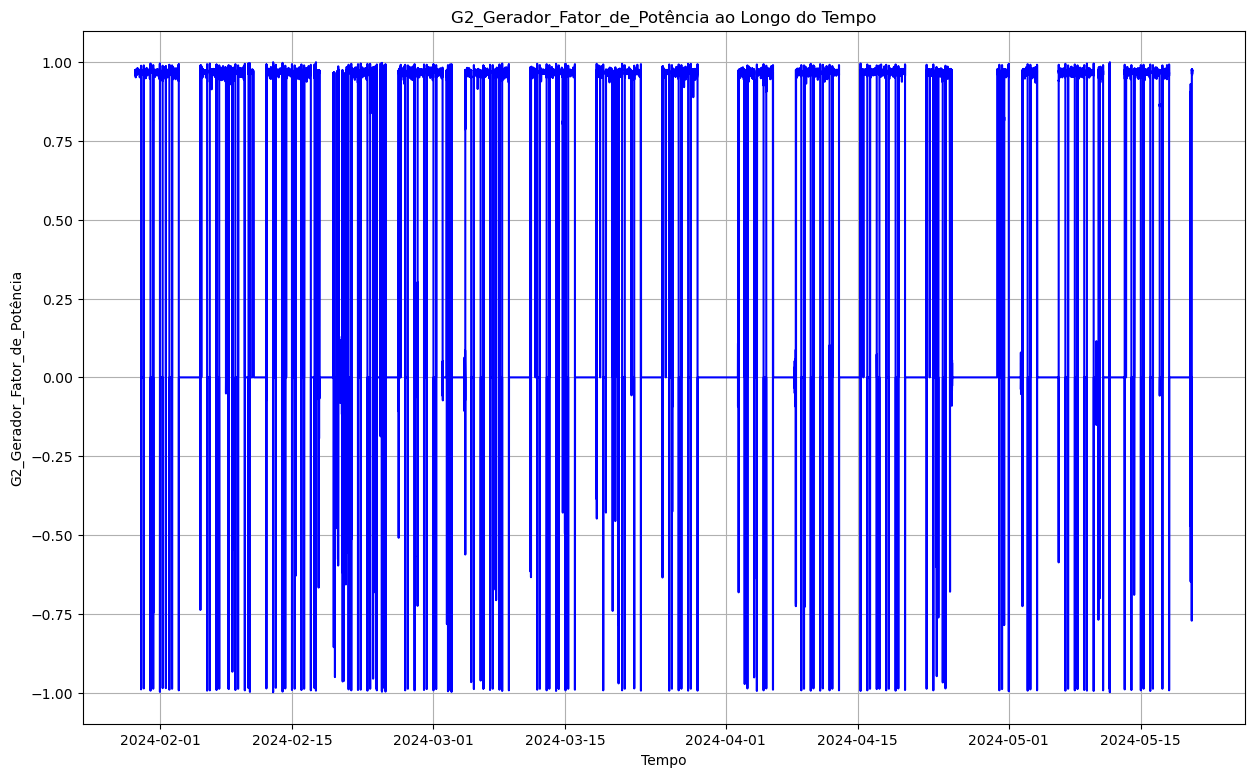

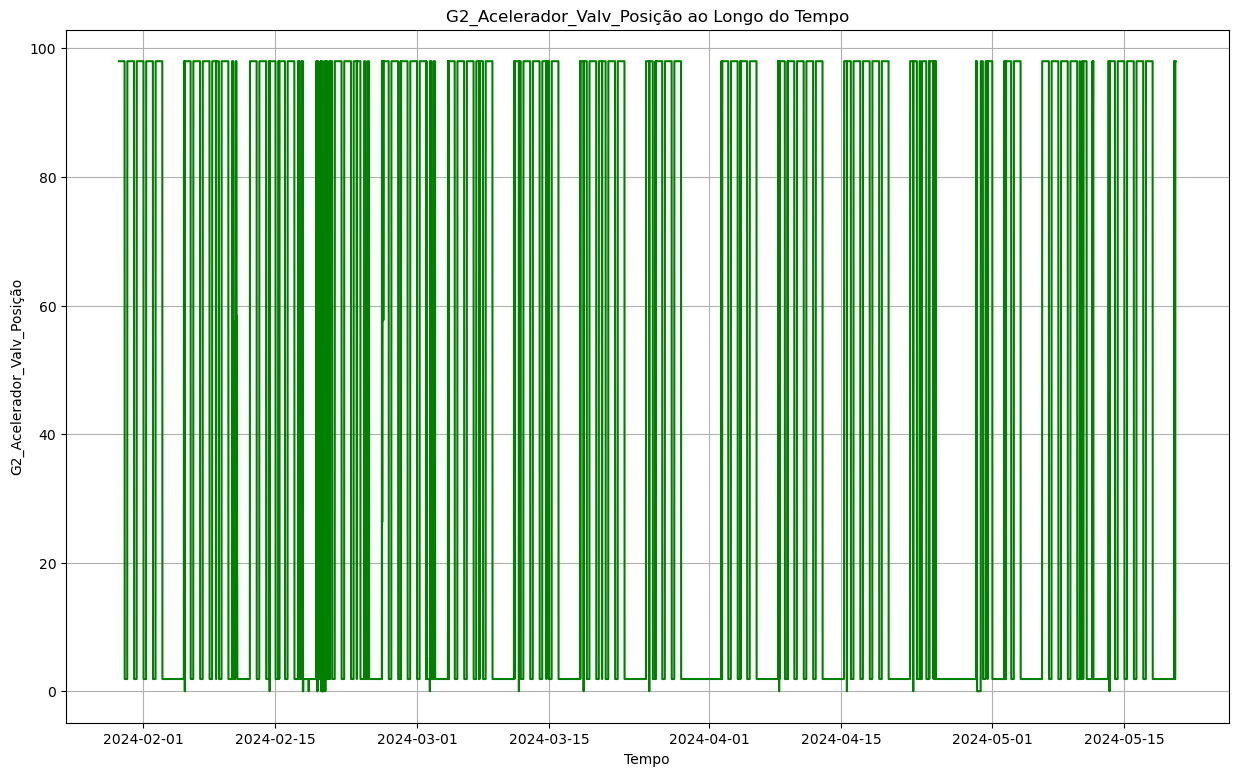

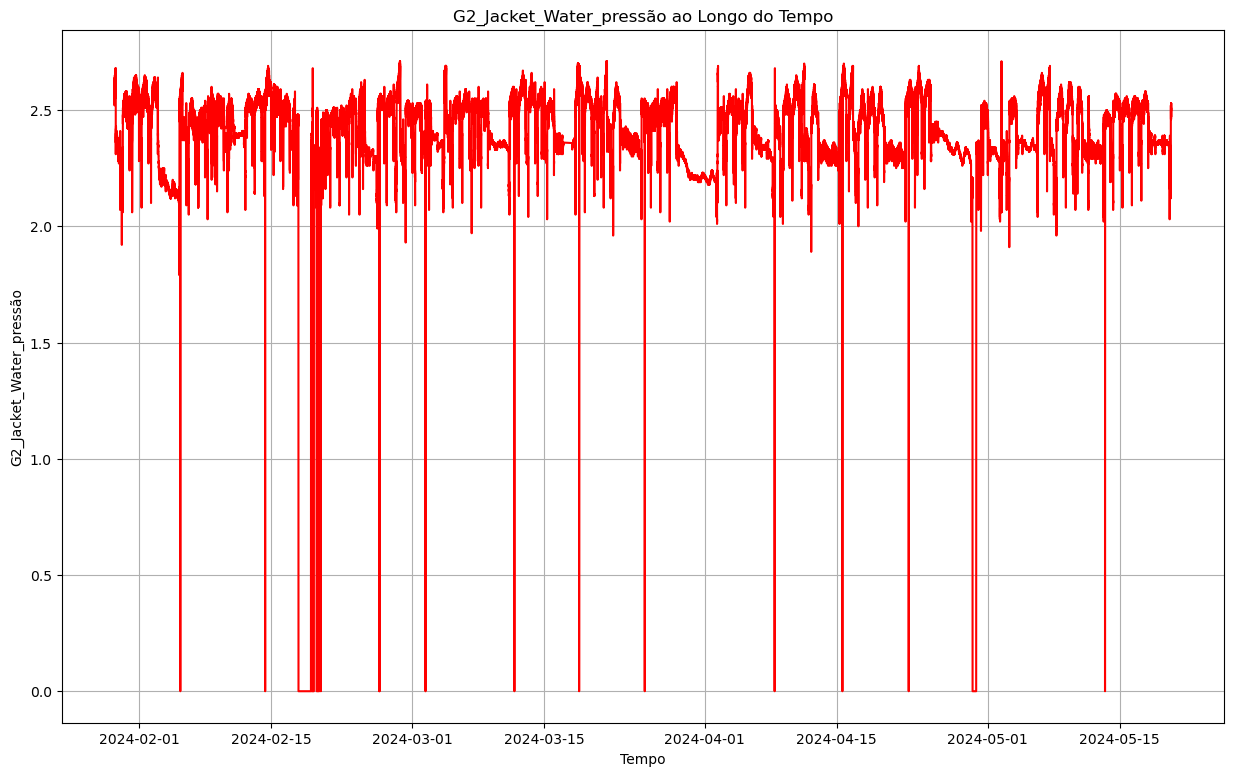

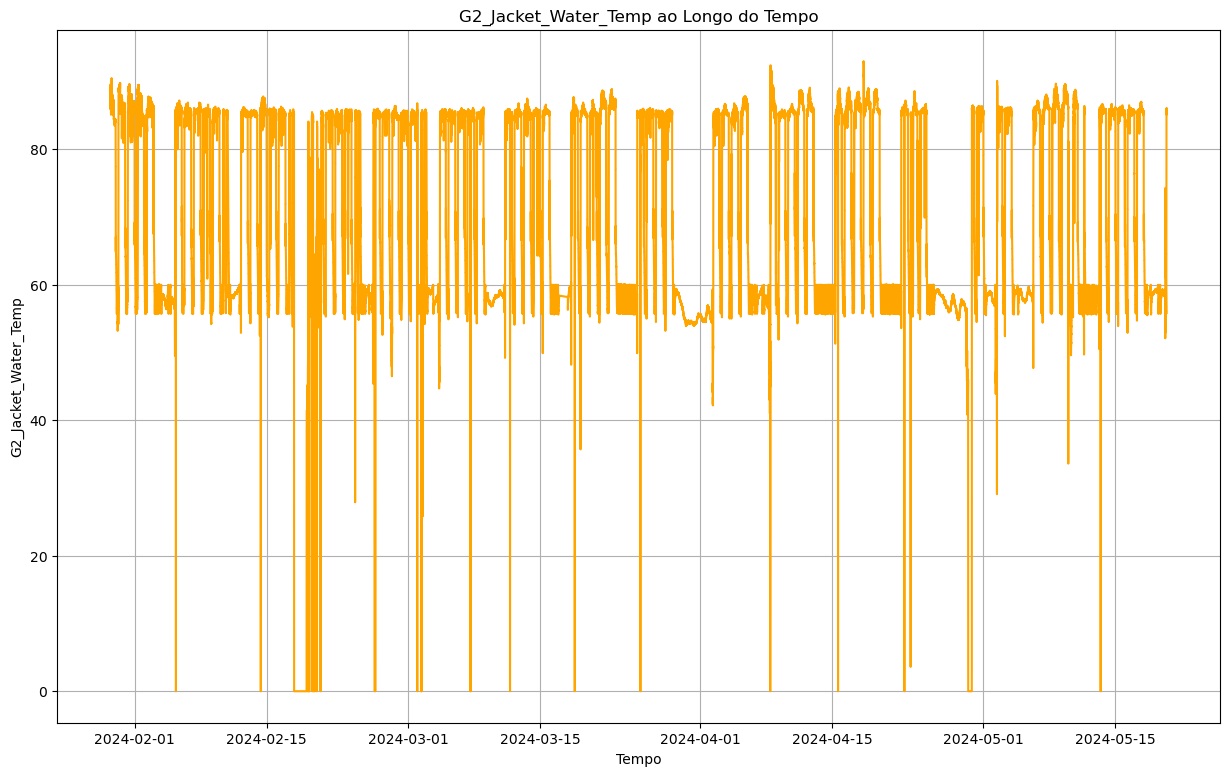

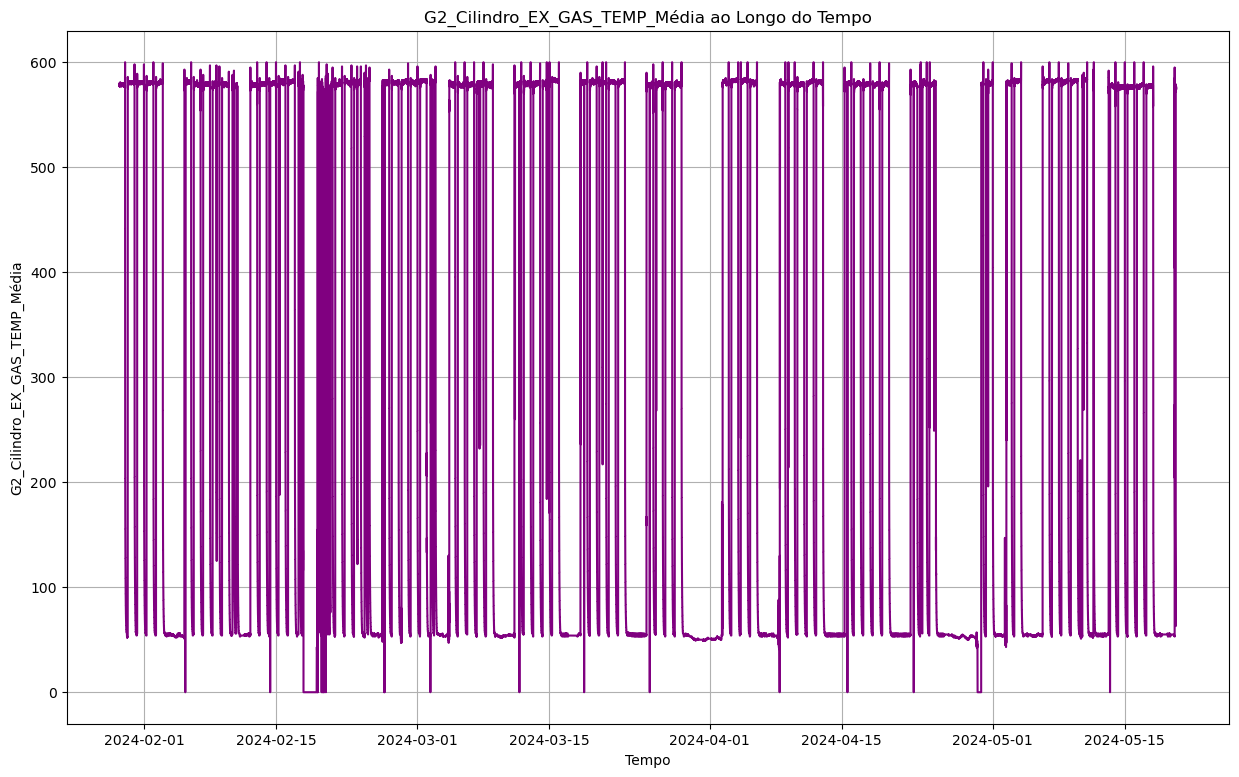

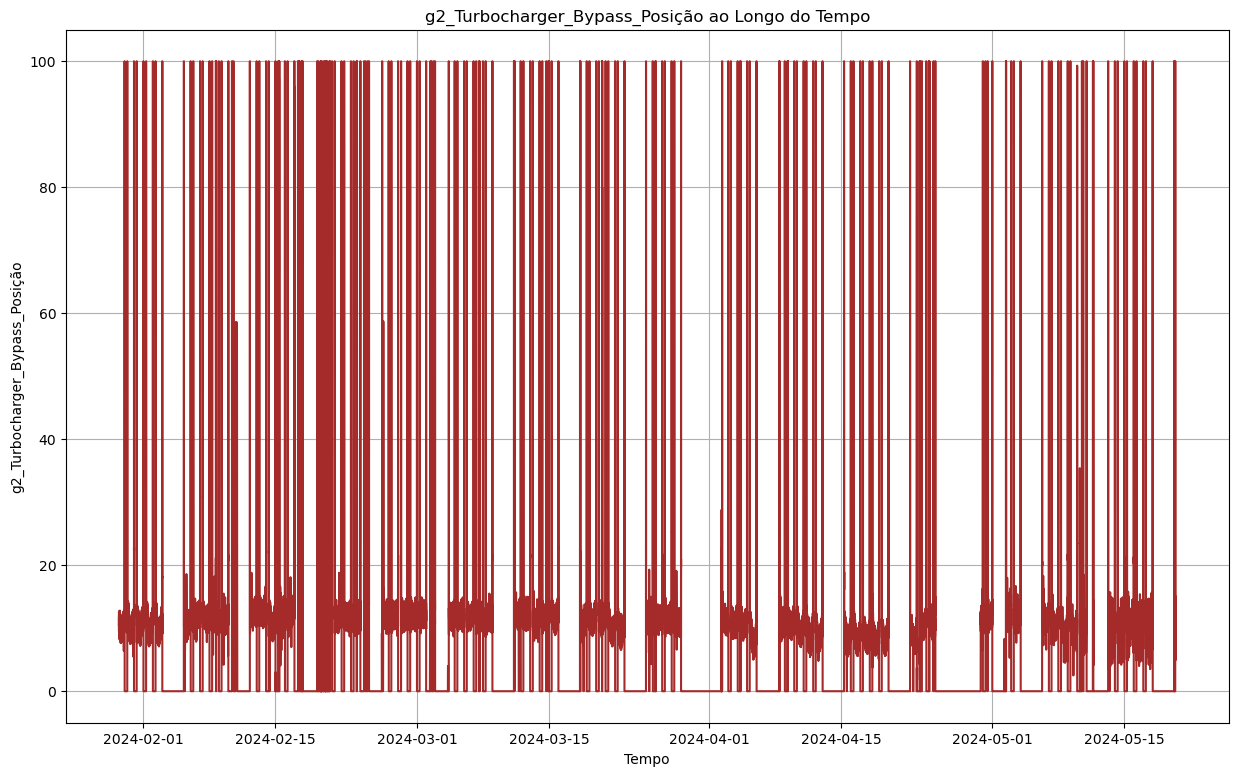

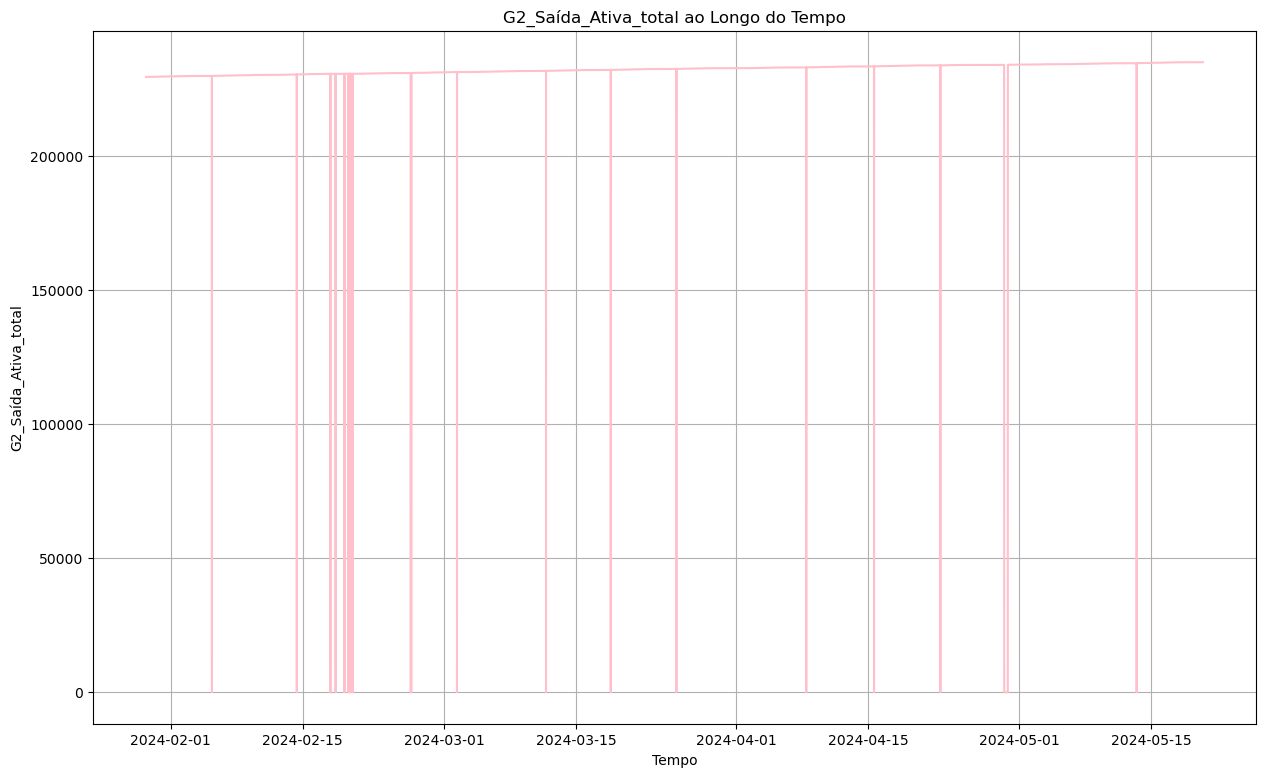

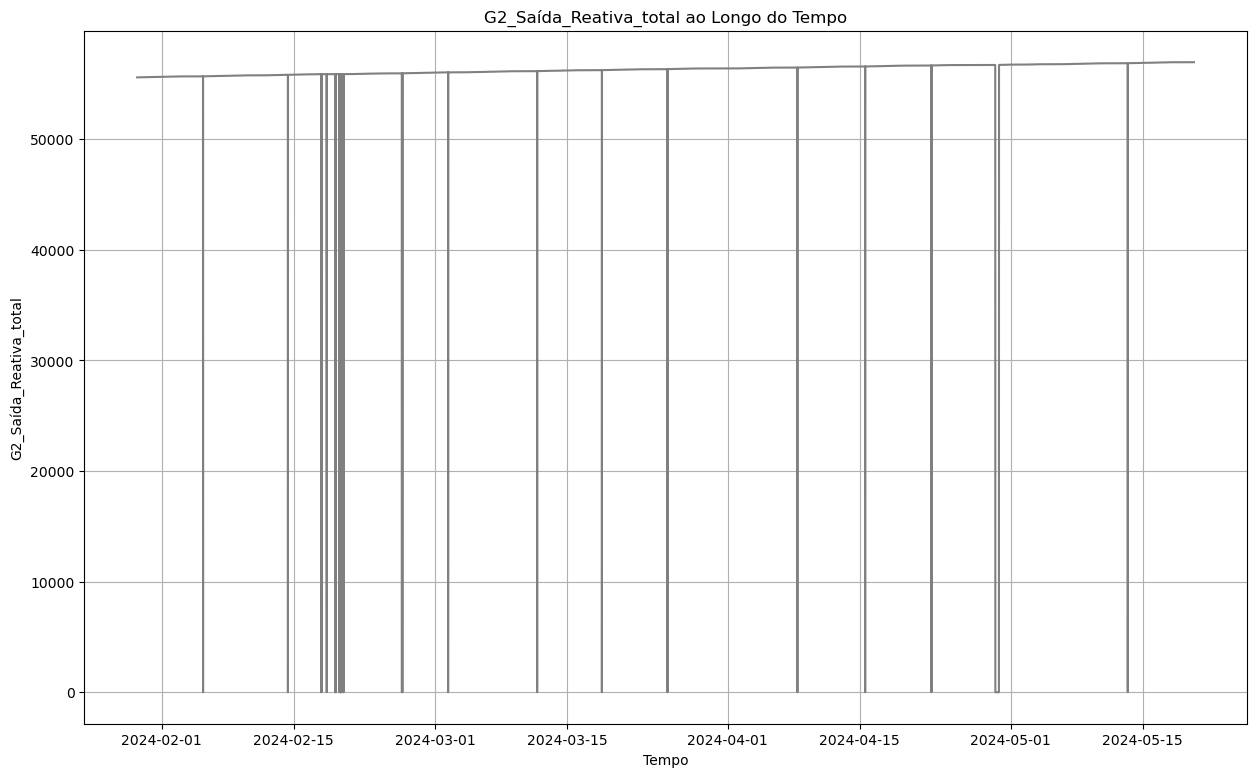

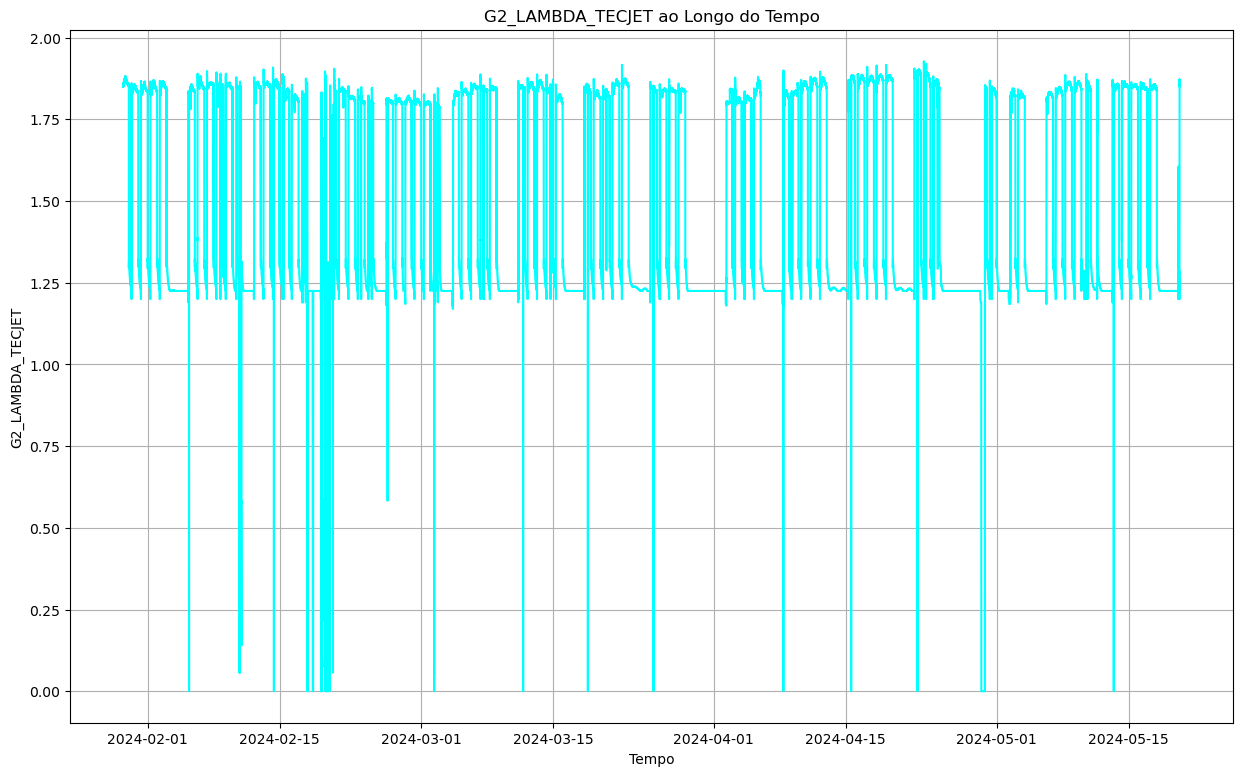

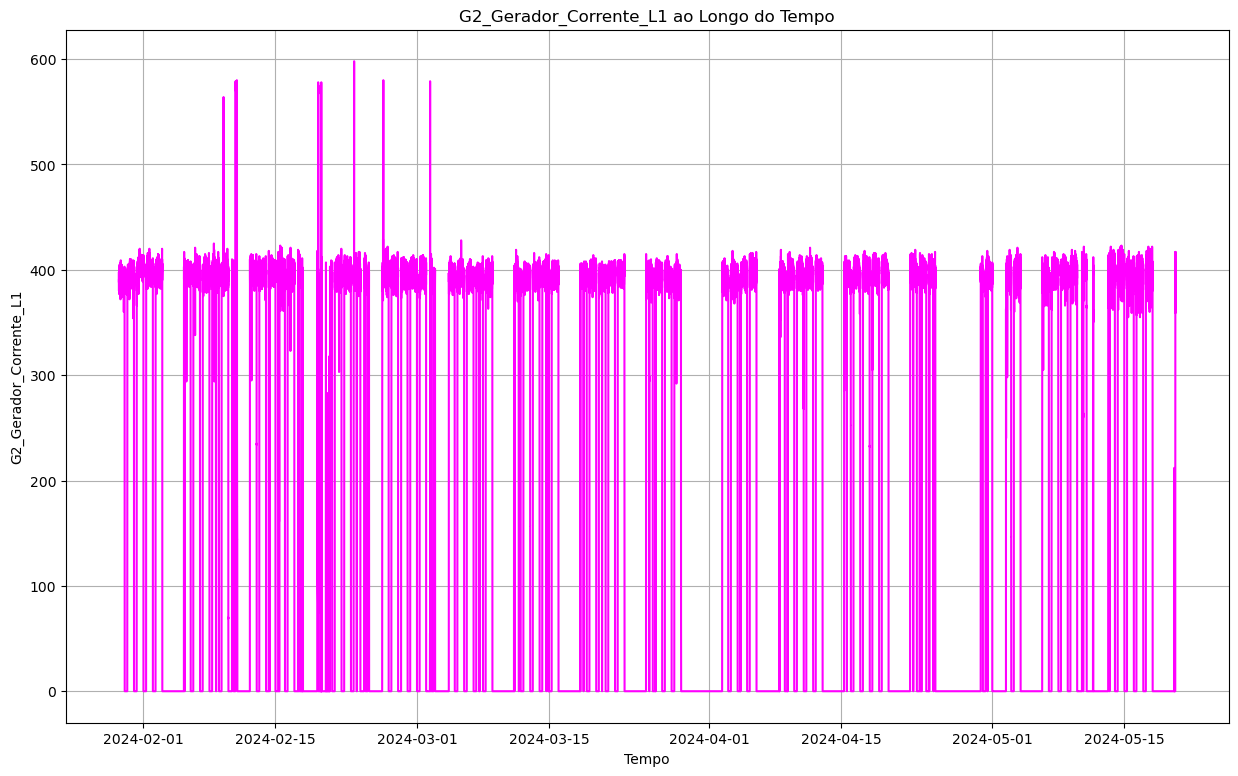

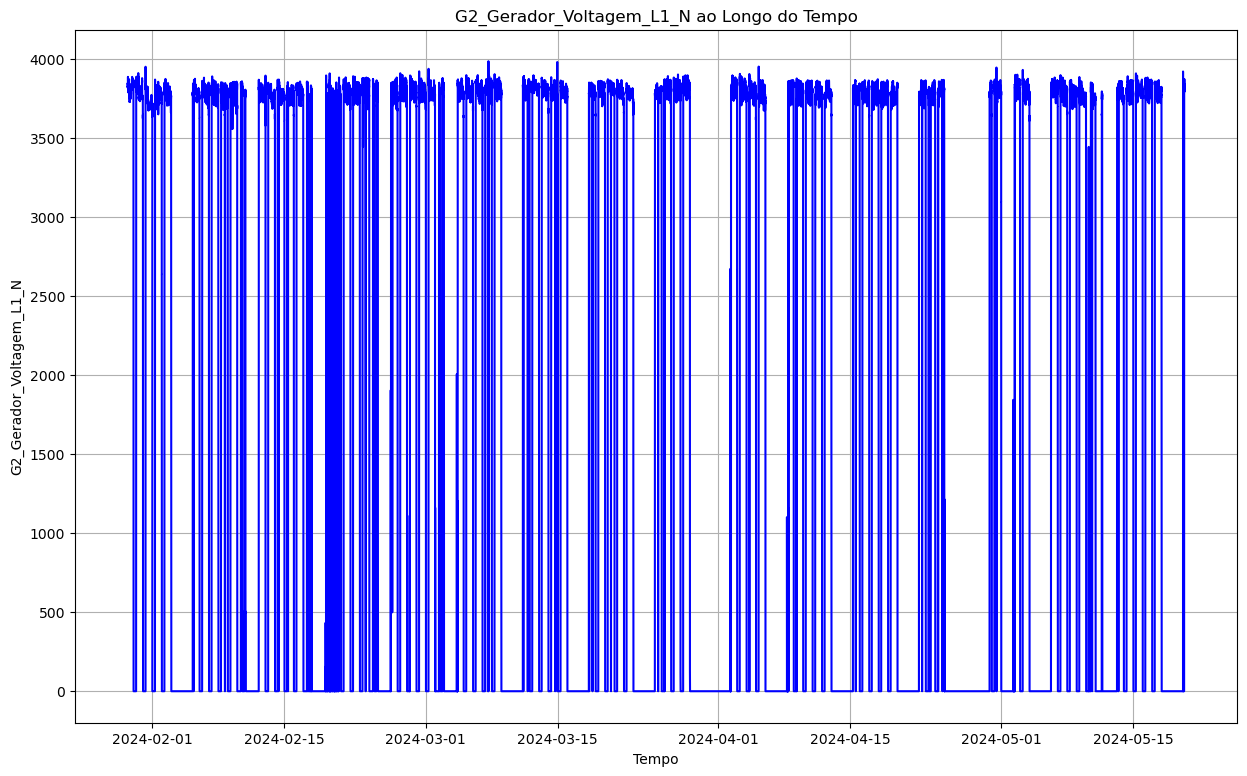

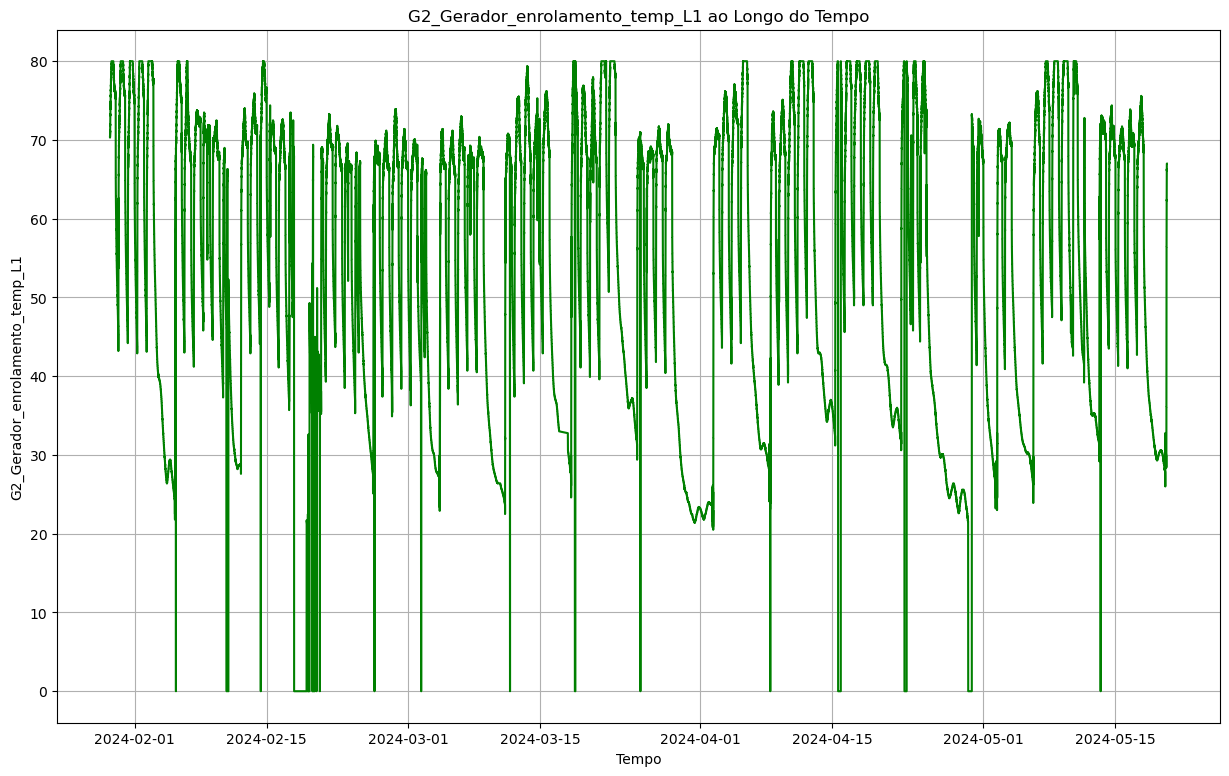

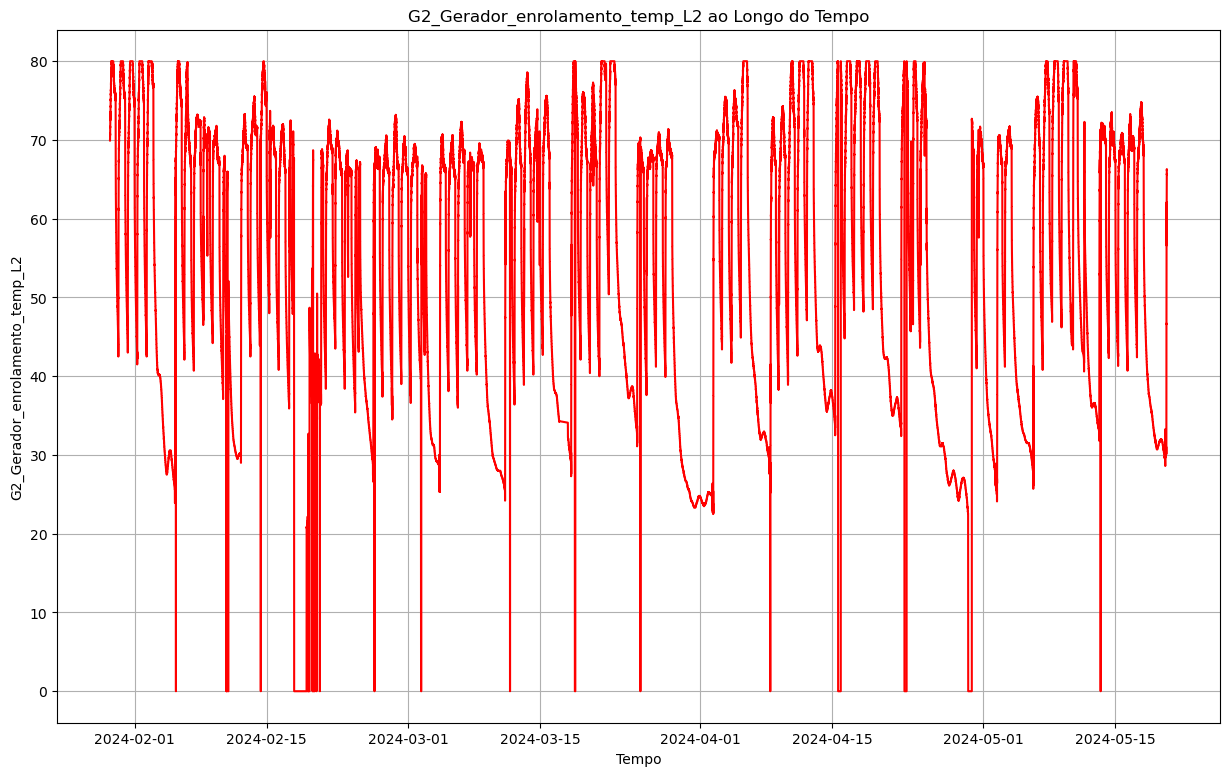

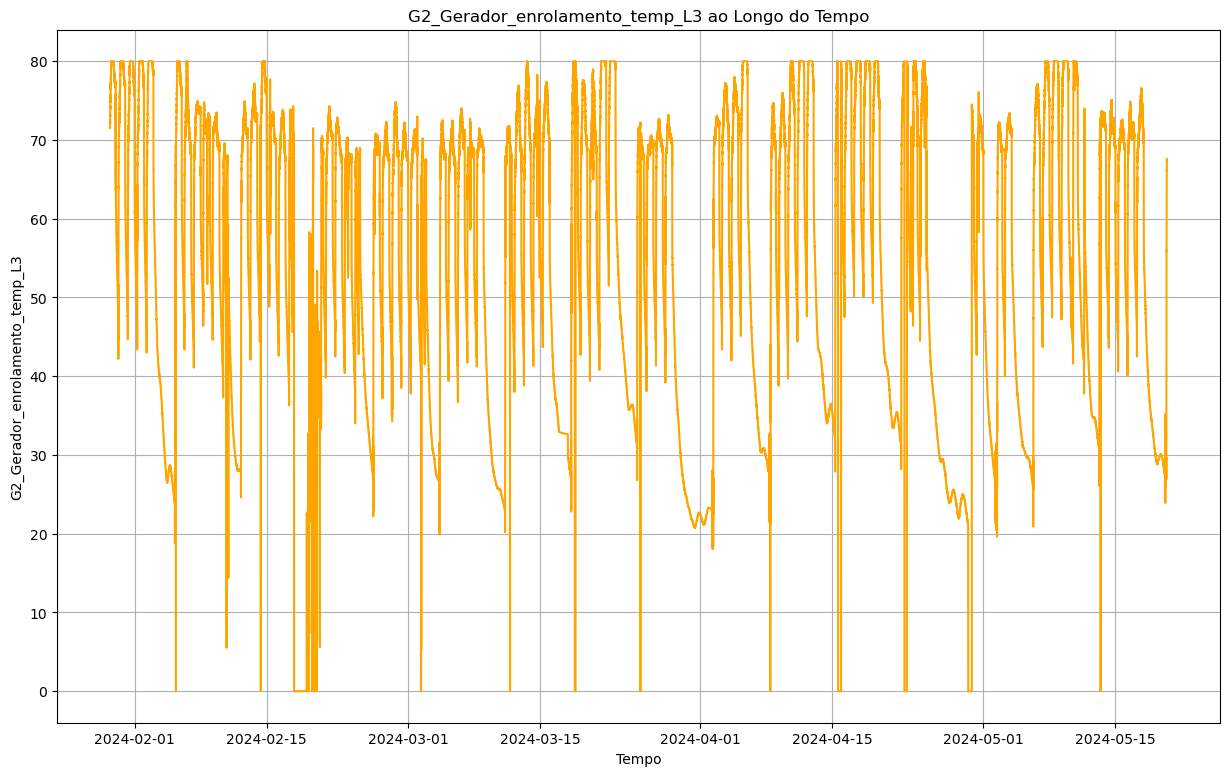

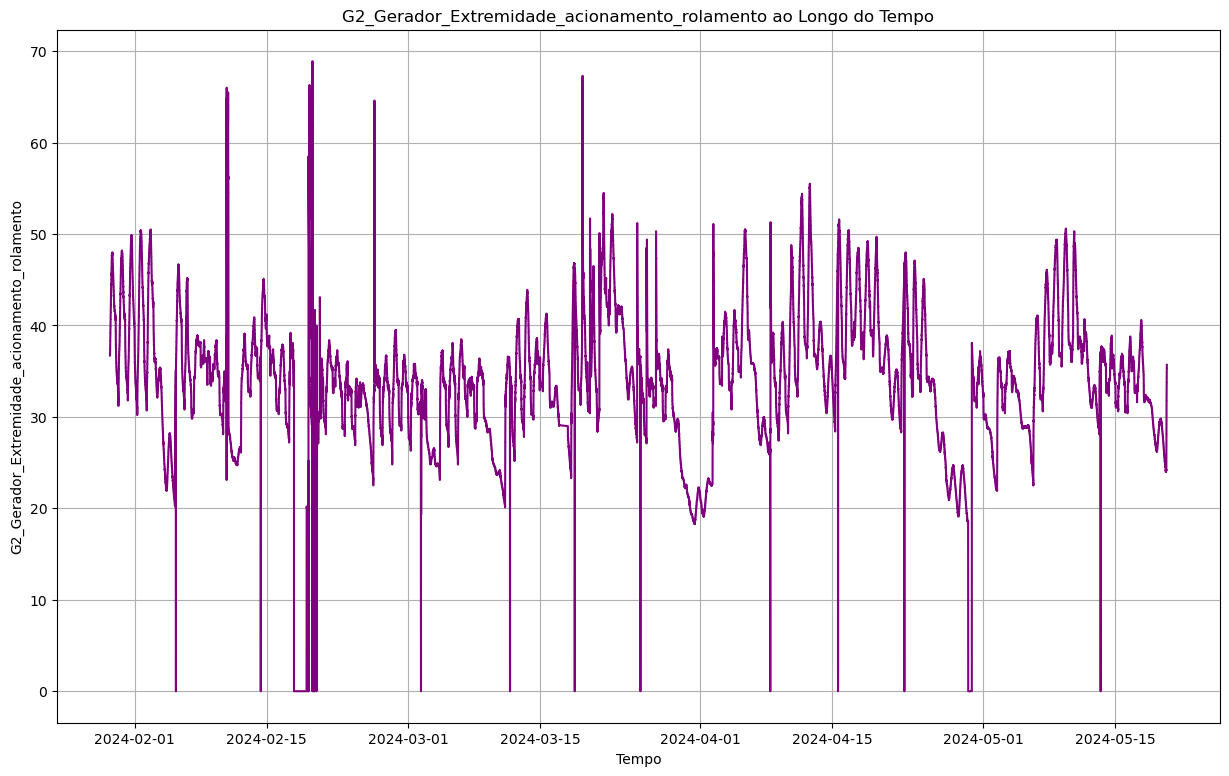

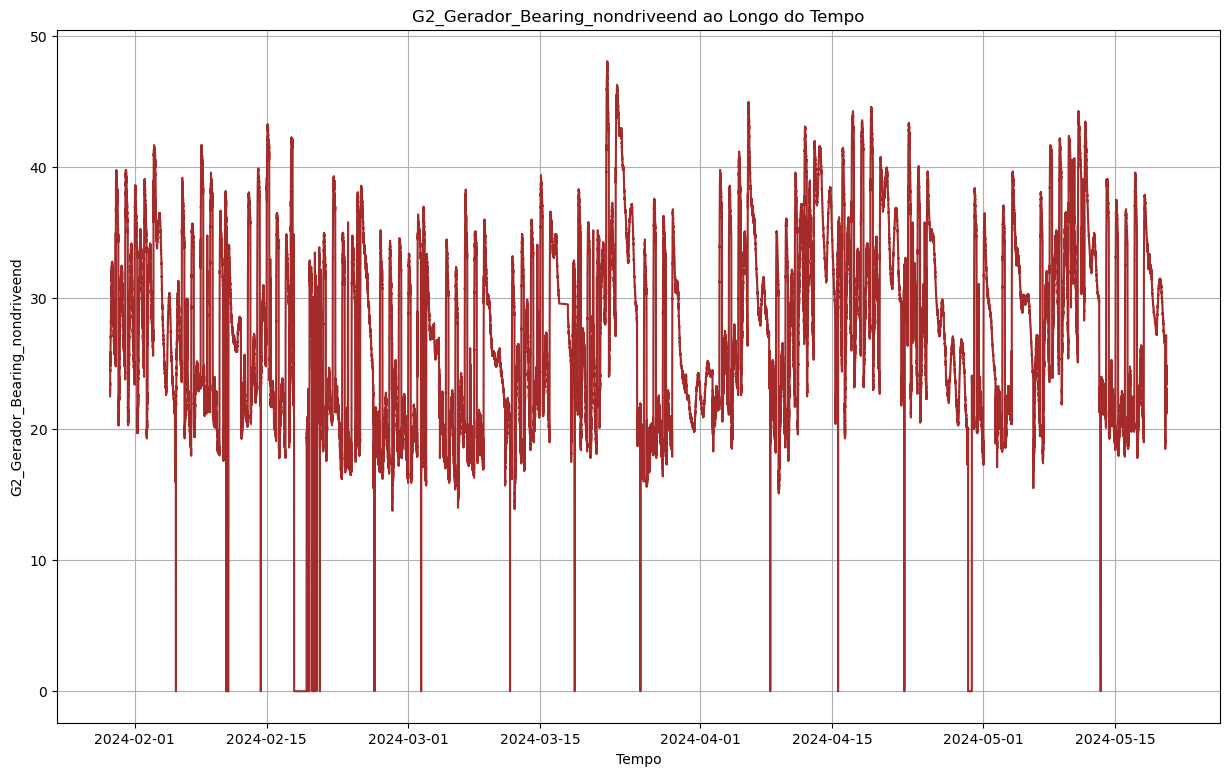

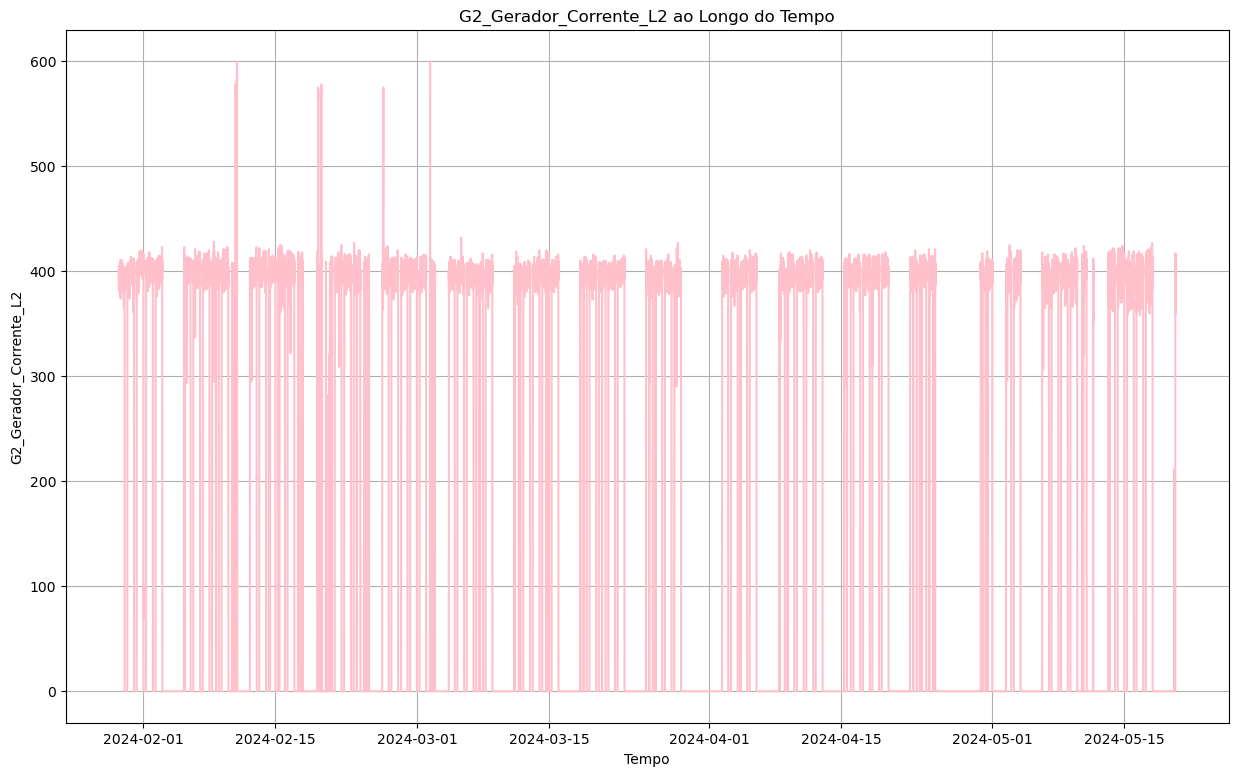

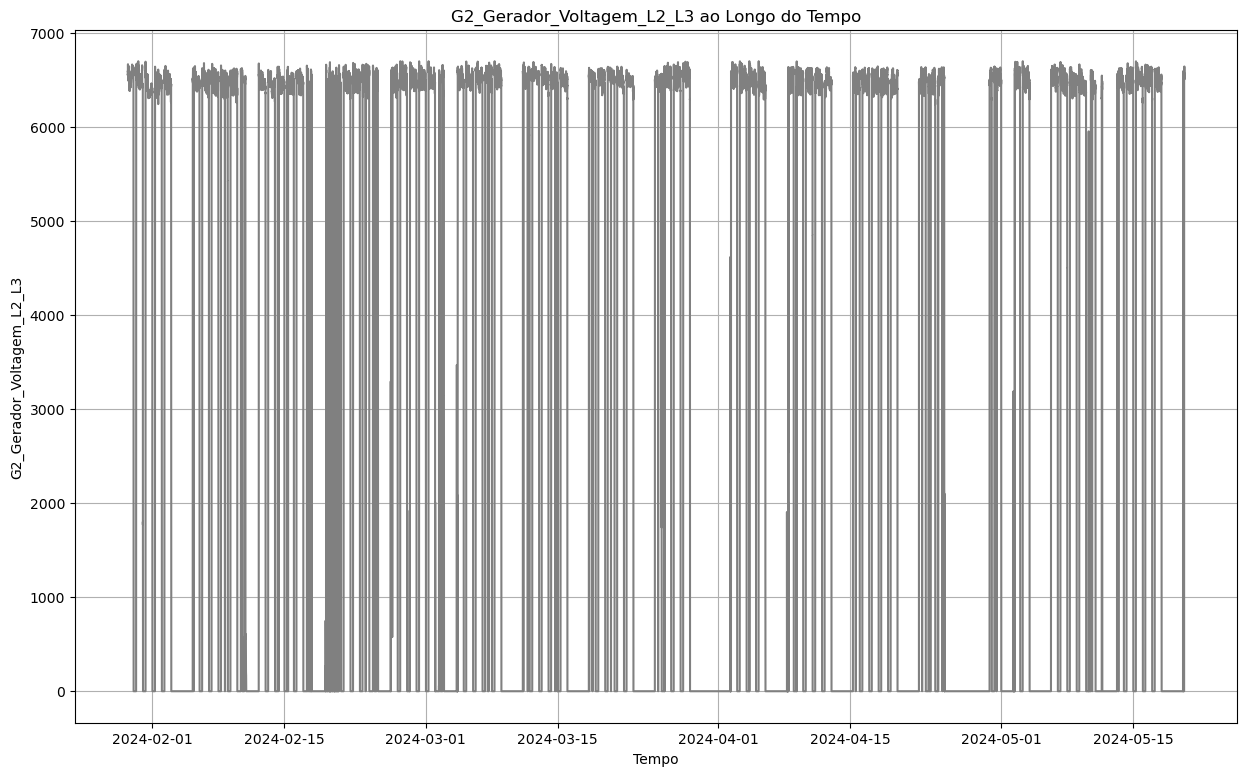

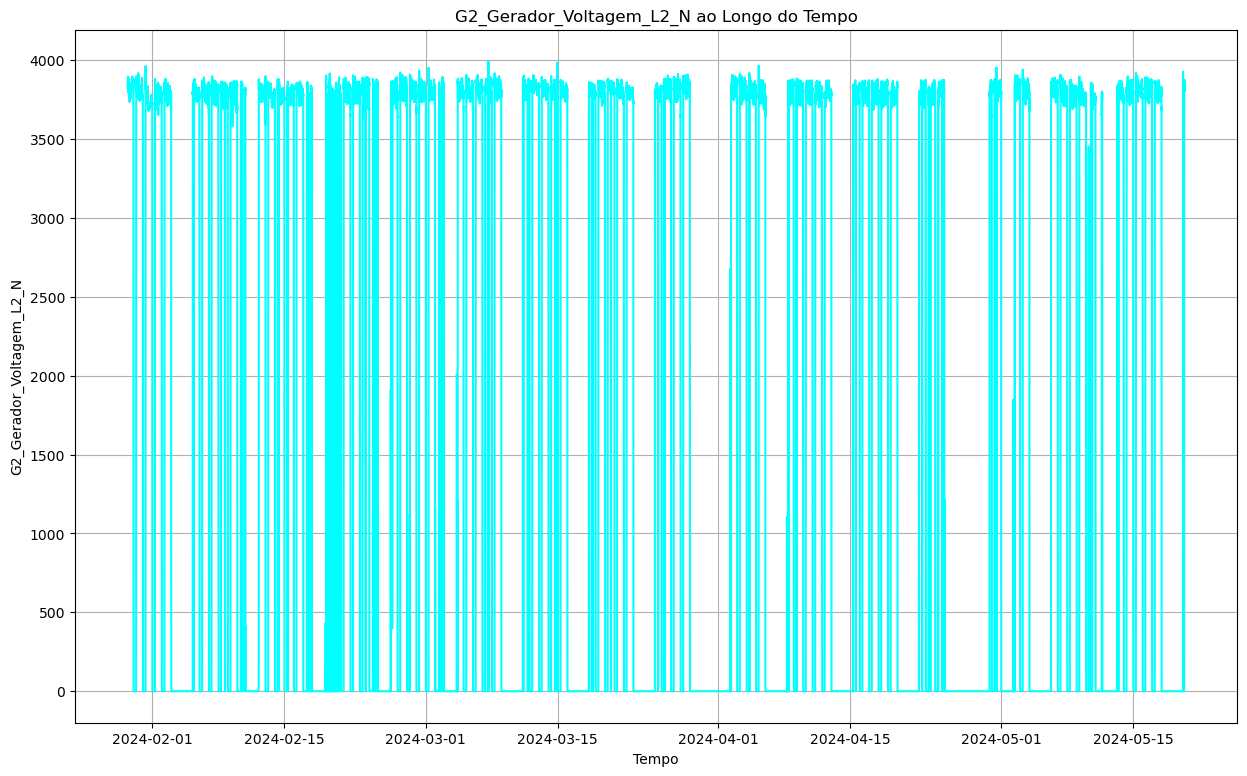

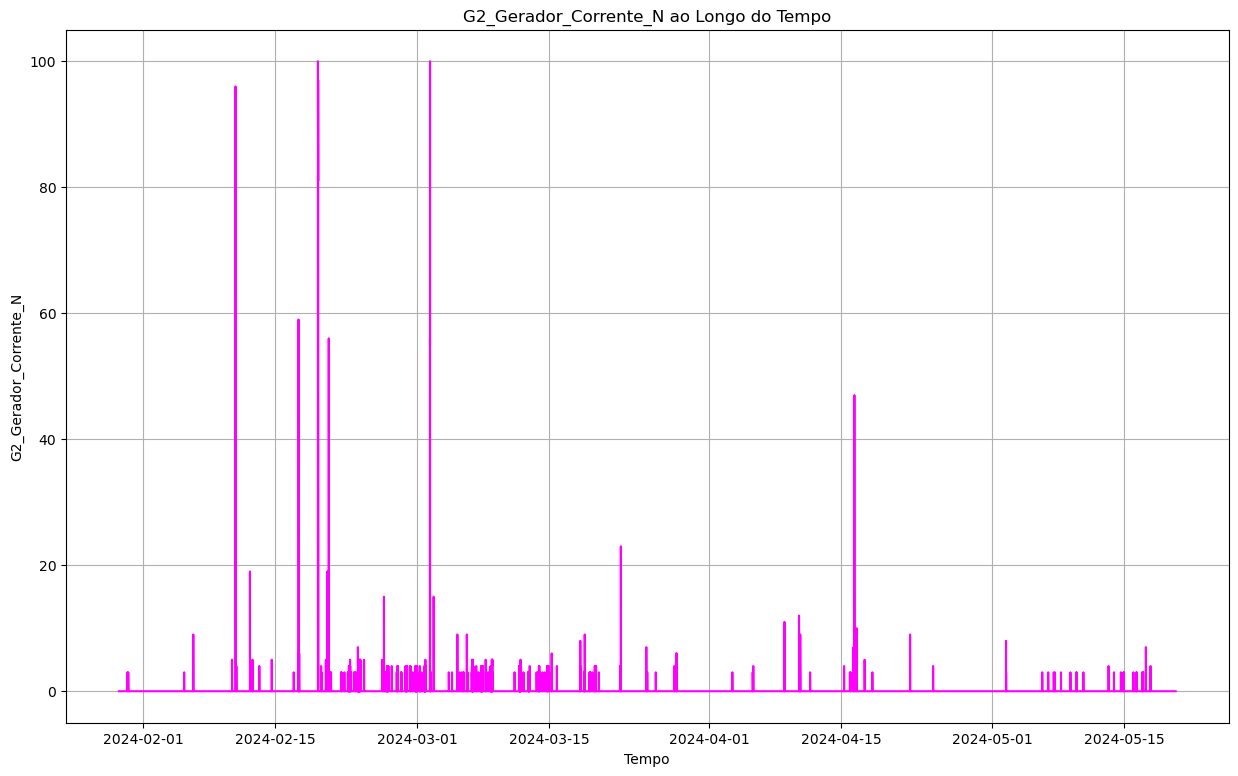

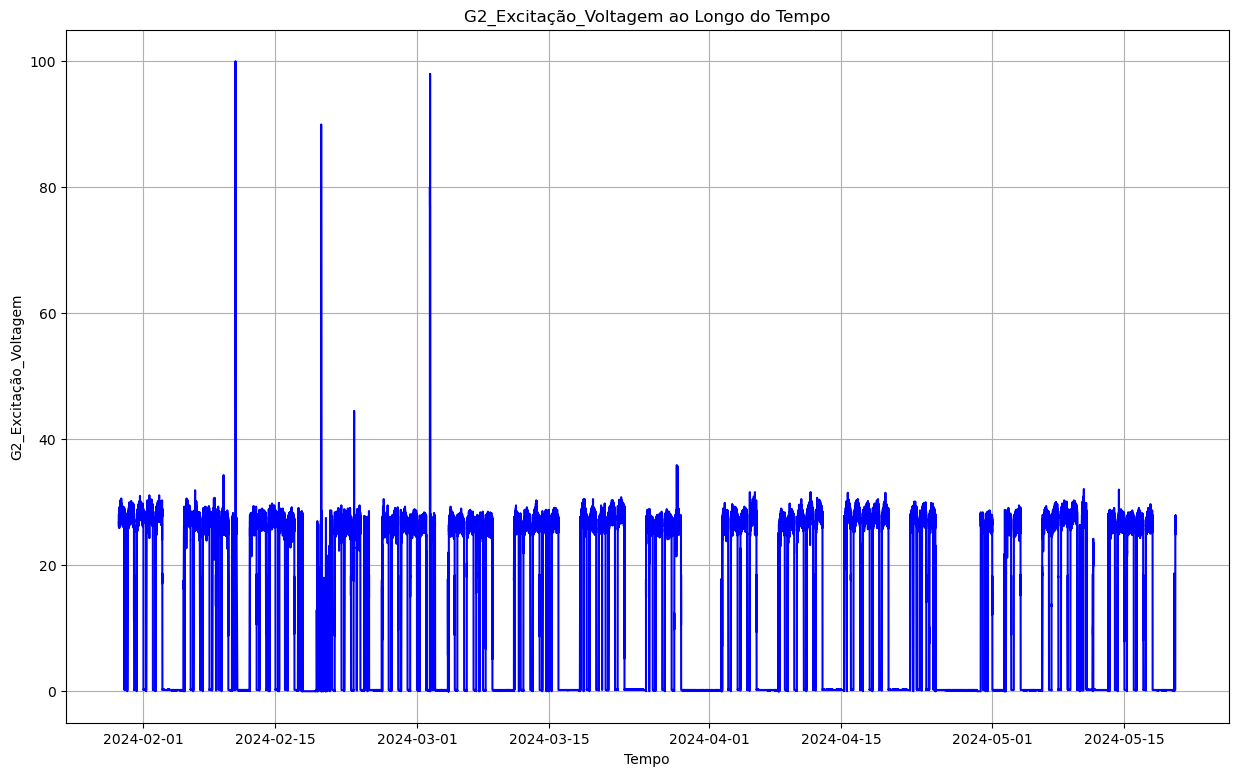

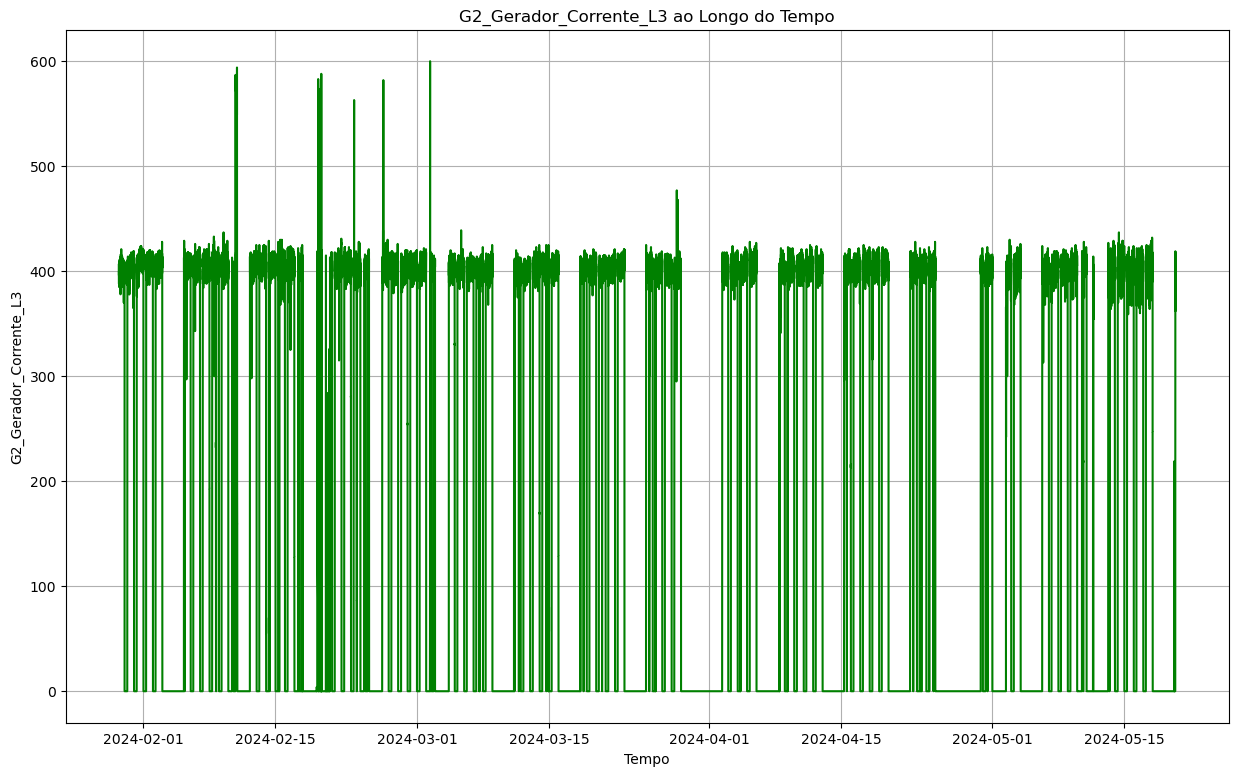

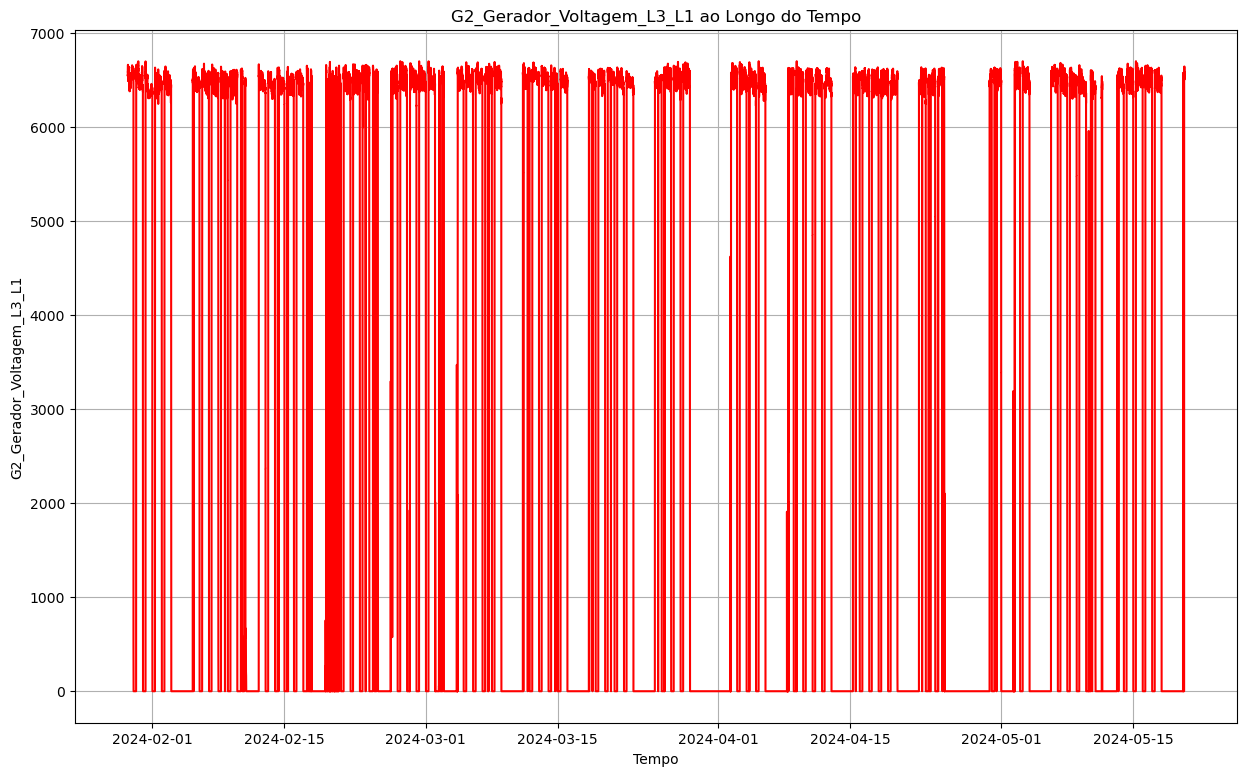

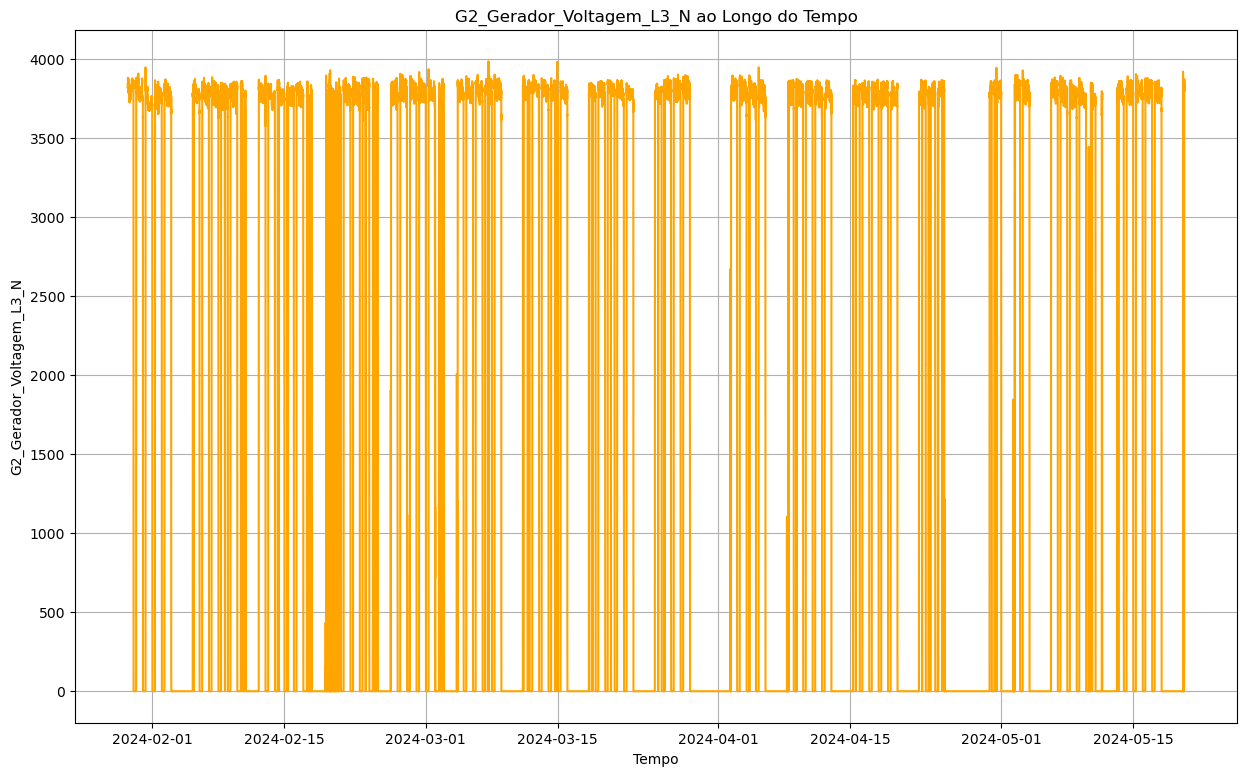

In [5]:
def plotar_graficos(df_parte_I):
    # Lista de cores
    cores = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']
    
    for i, coluna in enumerate(df_parte_I.columns):
        plt.figure(figsize=(15, 9))
        plt.plot(df_parte_I.index, df_parte_I[coluna], color=cores[i % len(cores)], linestyle='-')
        plt.title(f'{coluna} ao Longo do Tempo')
        plt.xlabel('Tempo')
        plt.ylabel(coluna)
        plt.grid(True)
        plt.show()

# Chamar a função para plotar os gráficos para todas as colunas
plotar_graficos(df_parte_I)

In [12]:
df_res

,G2_Gerador_Potência,G2_Oleo_Motor_Temp,G2_Oleo_Motor_Press,G2_Carga_Temperature,G2_Aumento_Pressão_Valvula_Real,G2_Gerador_Corrente_Média,G2_Gerador_Tensão_Média,G2_Gerador_Potência_Reativa,G2_Gerador_Potência_Aparente,G2_Gerador_frequencia,...,G2_Gerador_Extremidade_acionamento_rolamento,G2_Gerador_Bearing_nondriveend,G2_Gerador_Corrente_L2,G2_Gerador_Voltagem_L2_L3,G2_Gerador_Voltagem_L2_N,G2_Gerador_Corrente_N,G2_Excitação_Voltagem,G2_Gerador_Corrente_L3,G2_Gerador_Voltagem_L3_L1,G2_Gerador_Voltagem_L3_N
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-29 09:33:00,4404.166667,80.550,4.070,56.150000,6.151667,395.166667,6558.00,1068.00,4532.250000,50.0,...,36.7,22.7,393.416667,6557.00,3834.0,0.0,26.800000,398.00,6549.000000,3818.0
2024-01-29 09:34:00,4395.000000,80.625,4.065,53.683333,6.110000,393.750000,6566.00,1081.50,4528.833333,50.0,...,36.7,22.5,394.000000,6564.00,3838.0,0.0,26.766667,398.50,6555.583333,3822.0
2024-01-29 09:35:00,4394.500000,80.650,4.065,55.775000,6.140000,392.000000,6572.75,1072.25,4525.500000,50.0,...,36.8,22.5,394.000000,6572.00,3843.0,0.0,26.825000,399.00,6563.000000,3826.0
2024-01-29 09:36:00,4408.666667,80.700,4.060,54.550000,6.130000,395.250000,6582.00,1105.50,4542.000000,50.0,...,36.8,22.6,394.500000,6579.50,3847.0,0.0,26.850000,399.25,6571.000000,3830.0
2024-01-29 09:37:00,4395.000000,80.750,4.060,54.850000,6.130000,393.000000,6584.00,1129.00,4537.250000,50.0,...,36.8,22.8,393.000000,6582.00,3848.5,0.0,27.100000,398.50,6574.000000,3832.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-20 10:42:00,4393.000000,76.750,4.070,54.600000,6.200000,398.000000,6522.00,1151.50,4544.000000,49.9,...,35.4,22.7,397.000000,6521.00,3808.0,0.0,26.900000,400.00,6521.500000,3802.0
2024-05-20 10:43:00,4397.000000,76.800,4.070,54.600000,6.200000,397.000000,6524.50,1071.00,4532.500000,50.0,...,35.5,22.5,395.000000,6524.00,3810.0,0.0,26.400000,398.00,6522.000000,3803.0
2024-05-20 10:44:00,4402.500000,76.725,4.070,55.900000,6.220000,395.000000,6533.00,1035.00,4523.500000,50.0,...,35.5,22.5,394.000000,6533.75,3816.0,0.0,26.200000,397.00,6531.000000,3809.0


                     G2_Gerador_Potência  G2_Oleo_Motor_Temp  \
Datetime                                                       
2024-01-29 09:33:00          4404.166667              80.550   
2024-01-29 09:34:00          4395.000000              80.625   
2024-01-29 09:35:00          4394.500000              80.650   
2024-01-29 09:36:00          4408.666667              80.700   
2024-01-29 09:37:00          4395.000000              80.750   

                     G2_Oleo_Motor_Press  G2_Carga_Temperature  \
Datetime                                                         
2024-01-29 09:33:00                4.070             56.150000   
2024-01-29 09:34:00                4.065             53.683333   
2024-01-29 09:35:00                4.065             55.775000   
2024-01-29 09:36:00                4.060             54.550000   
2024-01-29 09:37:00                4.060             54.850000   

                     G2_Aumento_Pressão_Valvula_Real  \
Datetime                        

In [10]:
# Verificar se o índice contém datetime
if df_parte_I.index.dtype == 'datetime64[ns]':
    df_parte_I['data_hora'] = df_parte_I.index
else:
    # Se o índice não for datetime, ajuste de acordo
    df_parte_I.reset_index(inplace=True)
    df_parte_I['data_hora'] = pd.to_datetime(df_parte_I['index'])

# Converter a coluna de datetime para o tipo datetime, se necessário
df_parte_I['data_hora'] = pd.to_datetime(df_parte_I['data_hora'])

# Criar uma coluna de hora a partir da coluna de datetime
df_parte_I['hora'] = df_parte_I['data_hora'].dt.time

# Definir o intervalo de tempo desejado
hora_inicio = pd.to_datetime('06:50:00').time()
hora_fim = pd.to_datetime('23:59:59').time()

# Filtrar as linhas para incluir apenas os registros entre 06:50 e 23:59:59
df_intervalo = df_parte_I[(df_parte_I['hora'] >= hora_inicio) & (df_parte_I['hora'] <= hora_fim)]

# Adicionar as condições: potência gerada = 0 ou temperatura do óleo < 20 ou > 80
df_final = df_intervalo[(df_intervalo['G2_Gerador_Potência'] == 0) | 
                        (df_intervalo['G2_Oleo_Motor_Temp'] < 20) | 
                        (df_intervalo['G2_Oleo_Motor_Temp'] > 80)]

# Mostrar os datetimes onde as condições são atendidas
print(df_final['data_hora'])

Datetime
2024-01-29 09:33:08   2024-01-29 09:33:08
2024-01-29 09:33:09   2024-01-29 09:33:09
2024-01-29 09:33:10   2024-01-29 09:33:10
2024-01-29 09:33:11   2024-01-29 09:33:11
2024-01-29 09:33:12   2024-01-29 09:33:12
                              ...        
2024-05-20 09:37:56   2024-05-20 09:37:56
2024-05-20 09:37:57   2024-05-20 09:37:57
2024-05-20 09:37:58   2024-05-20 09:37:58
2024-05-20 09:37:59   2024-05-20 09:37:59
2024-05-20 09:38:00   2024-05-20 09:38:00
Name: data_hora, Length: 2479729, dtype: datetime64[ns]
